In [1]:
import json
import matplotlib.pyplot as plt

## Train and Val Loss graphs

#### Load Loss Data

In [2]:
LSTM_dat = None
with open("./Performance_Dump/Loss Dump/LSTM.json") as json_file: LSTM_dat = json.load(json_file)

Stacked_LSTM_dat = None
with open("./Performance_Dump/Loss Dump/Stacked_LSTM.json") as json_file: Stacked_LSTM_dat = json.load(json_file)

GRU_dat = None
with open("./Performance_Dump/Loss Dump/GRU.json") as json_file: GRU_dat = json.load(json_file)

LSTM_GRU_dat = None
with open("./Performance_Dump/Loss Dump/LSTM_GRU.json") as json_file: LSTM_GRU_dat = json.load(json_file)

#### LSTM

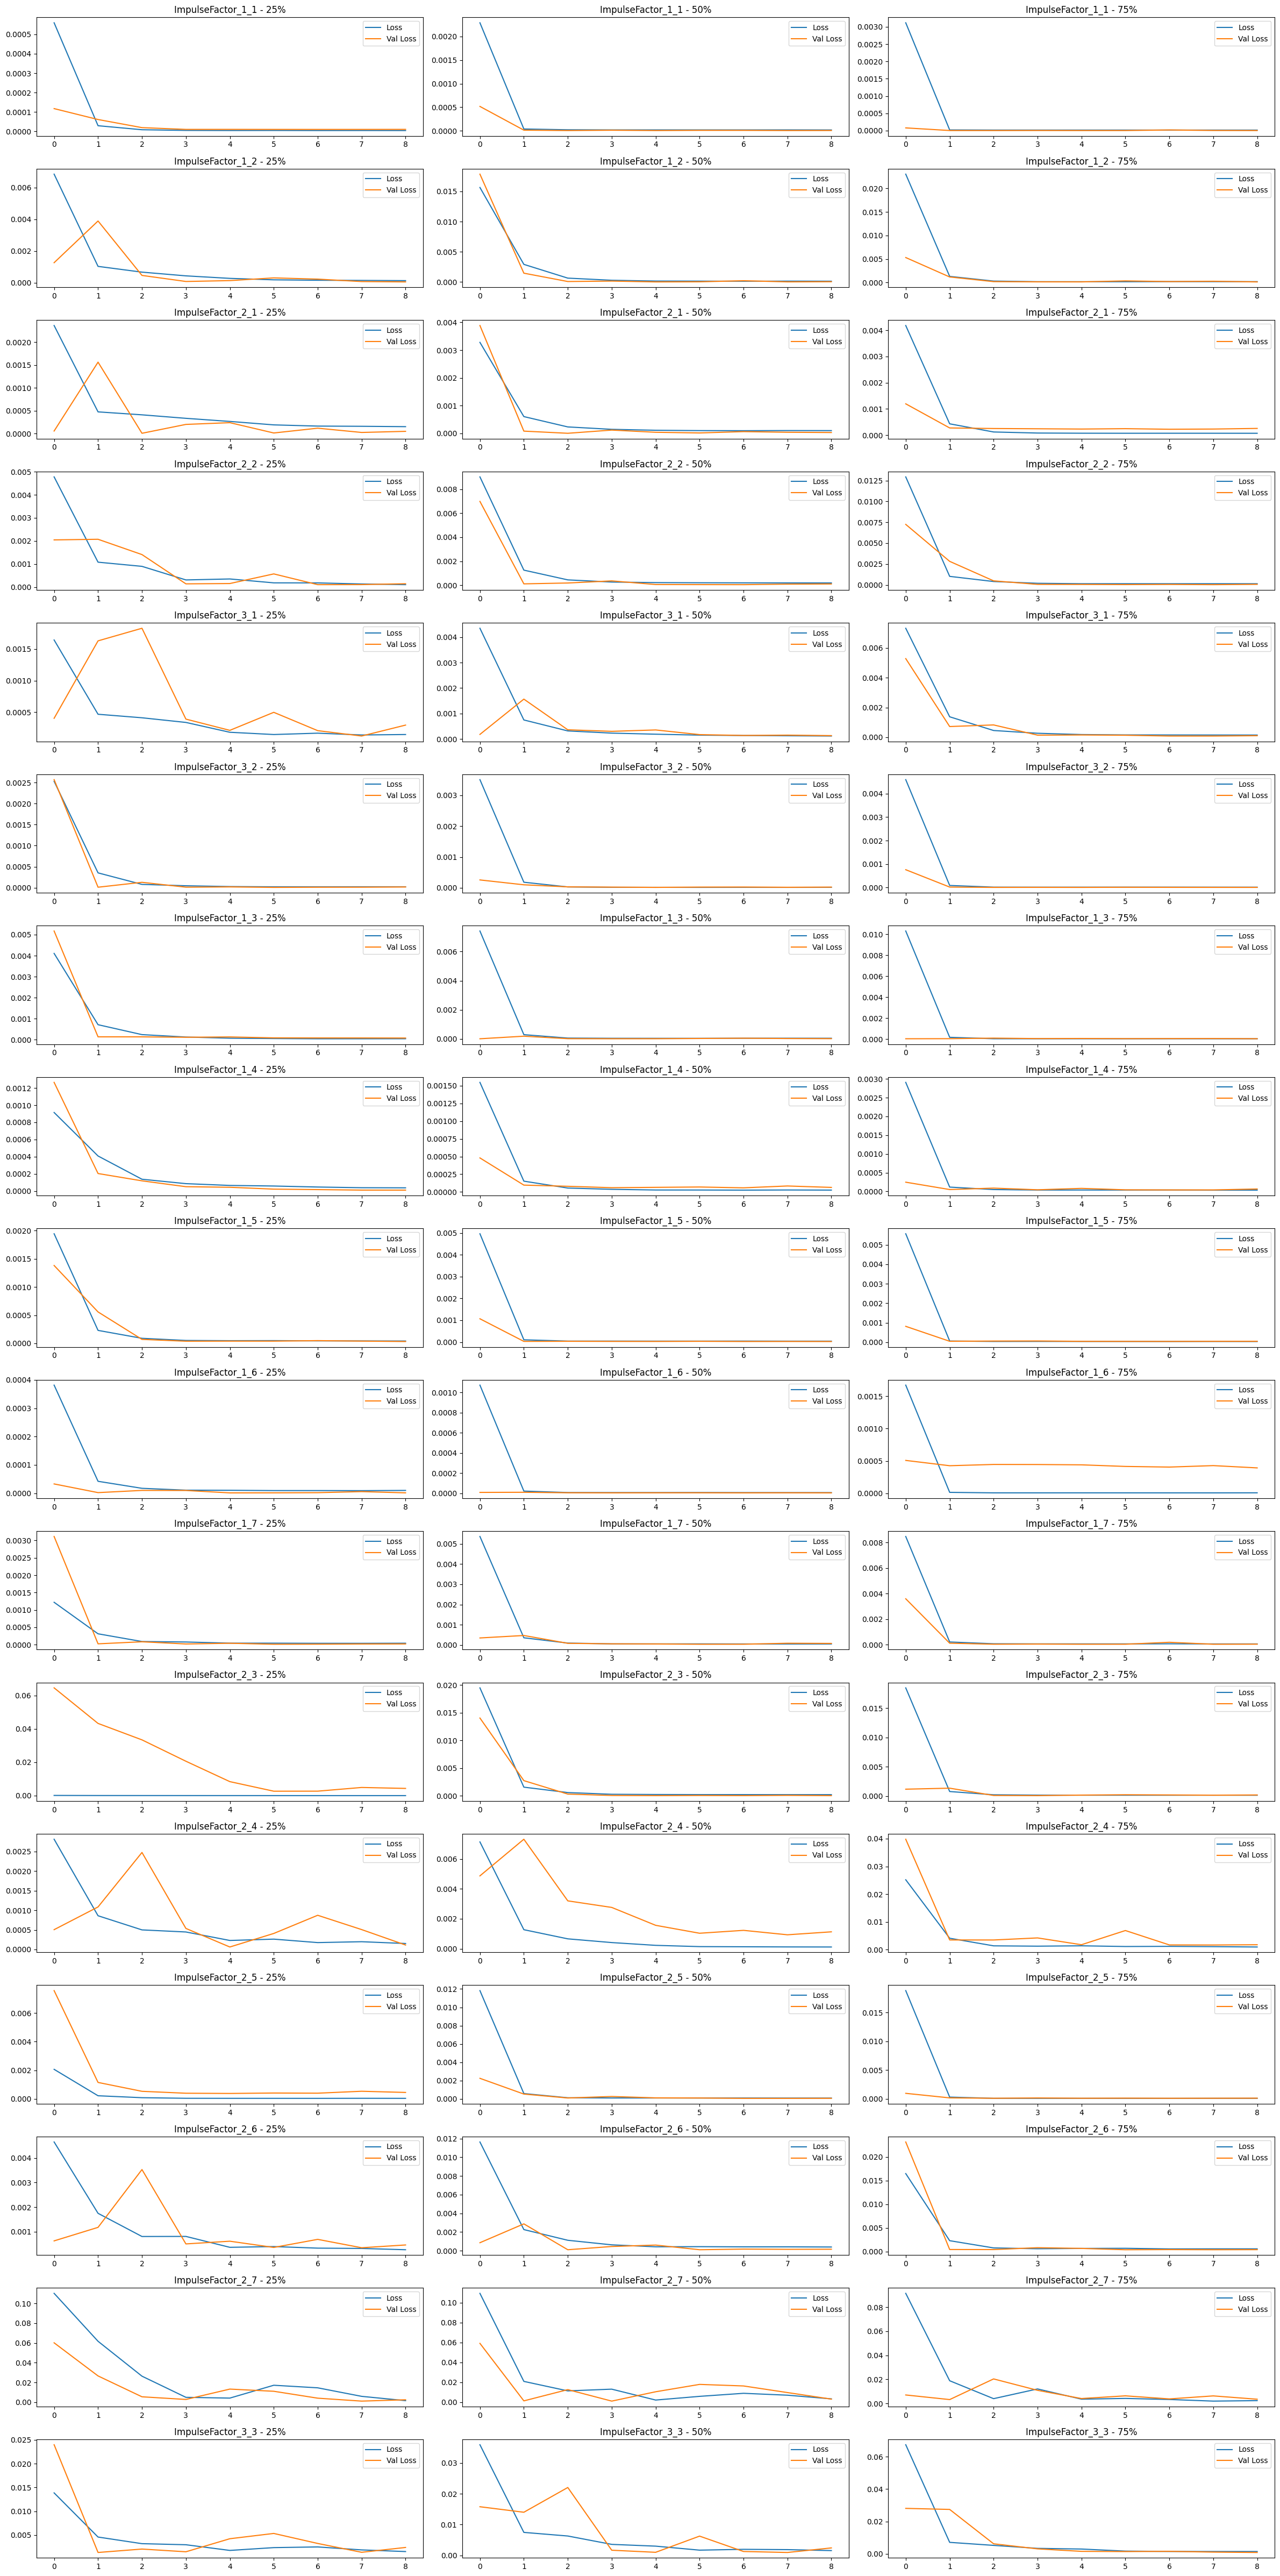

In [3]:
fig, axs = plt.subplots(len(LSTM_dat), 3, figsize=(24, 48))

for i, bearing in enumerate(LSTM_dat):
    bearing_id = list(bearing.keys())[0]
    bearing_losses = list(bearing.values())[0]

    for j, loss in enumerate(bearing_losses):

        train_loss = loss["loss"]
        val_loss = loss["val_loss"]

        axs[i, j].plot(train_loss, label='Loss')
        axs[i, j].plot(val_loss, label='Val Loss')
        axs[i, j].set_title(f"{bearing_id} - {(1 + j) * 25}%")
        axs[i, j].legend()

plt.tight_layout()
plt.show()

#### Stacked LSTM

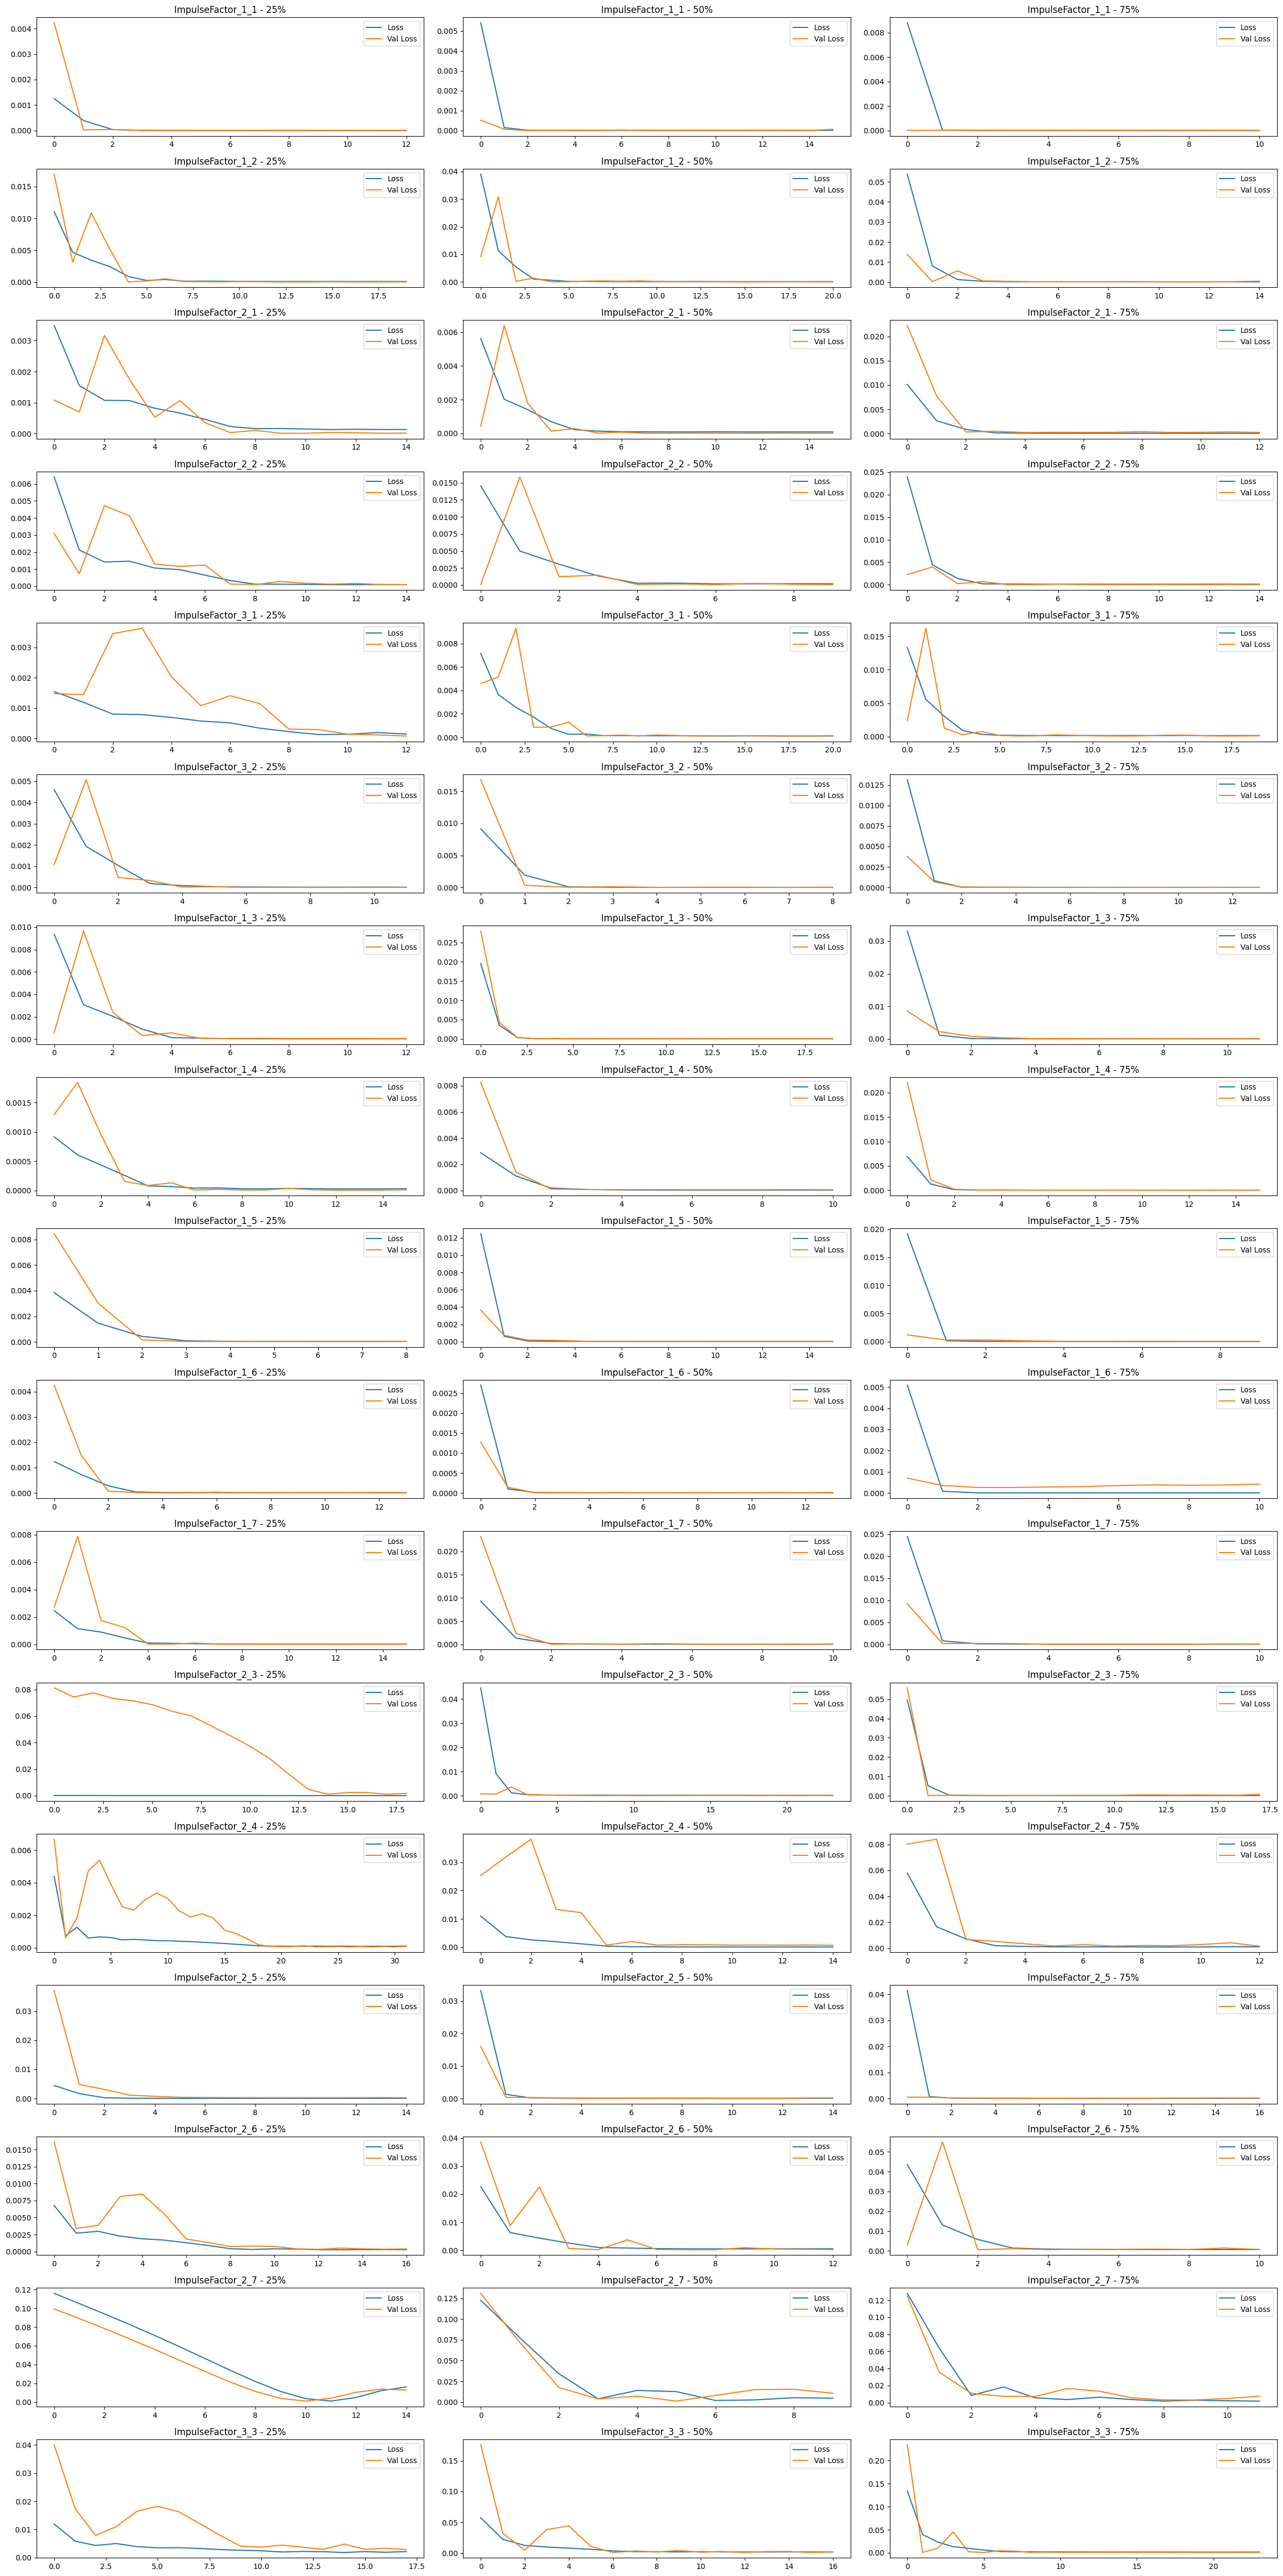

In [52]:
fig, axs = plt.subplots(len(Stacked_LSTM_dat), 3, figsize=(24, 48))

for i, bearing in enumerate(Stacked_LSTM_dat):
    bearing_id = list(bearing.keys())[0]
    bearing_losses = list(bearing.values())[0]

    for j, loss in enumerate(bearing_losses):

        train_loss = loss["loss"]
        val_loss = loss["val_loss"]

        axs[i, j].plot(train_loss, label='Loss')
        axs[i, j].plot(val_loss, label='Val Loss')
        axs[i, j].set_title(f"{bearing_id} - {(1 + j) * 25}%")
        axs[i, j].legend()

plt.tight_layout()
plt.show()

#### GRU

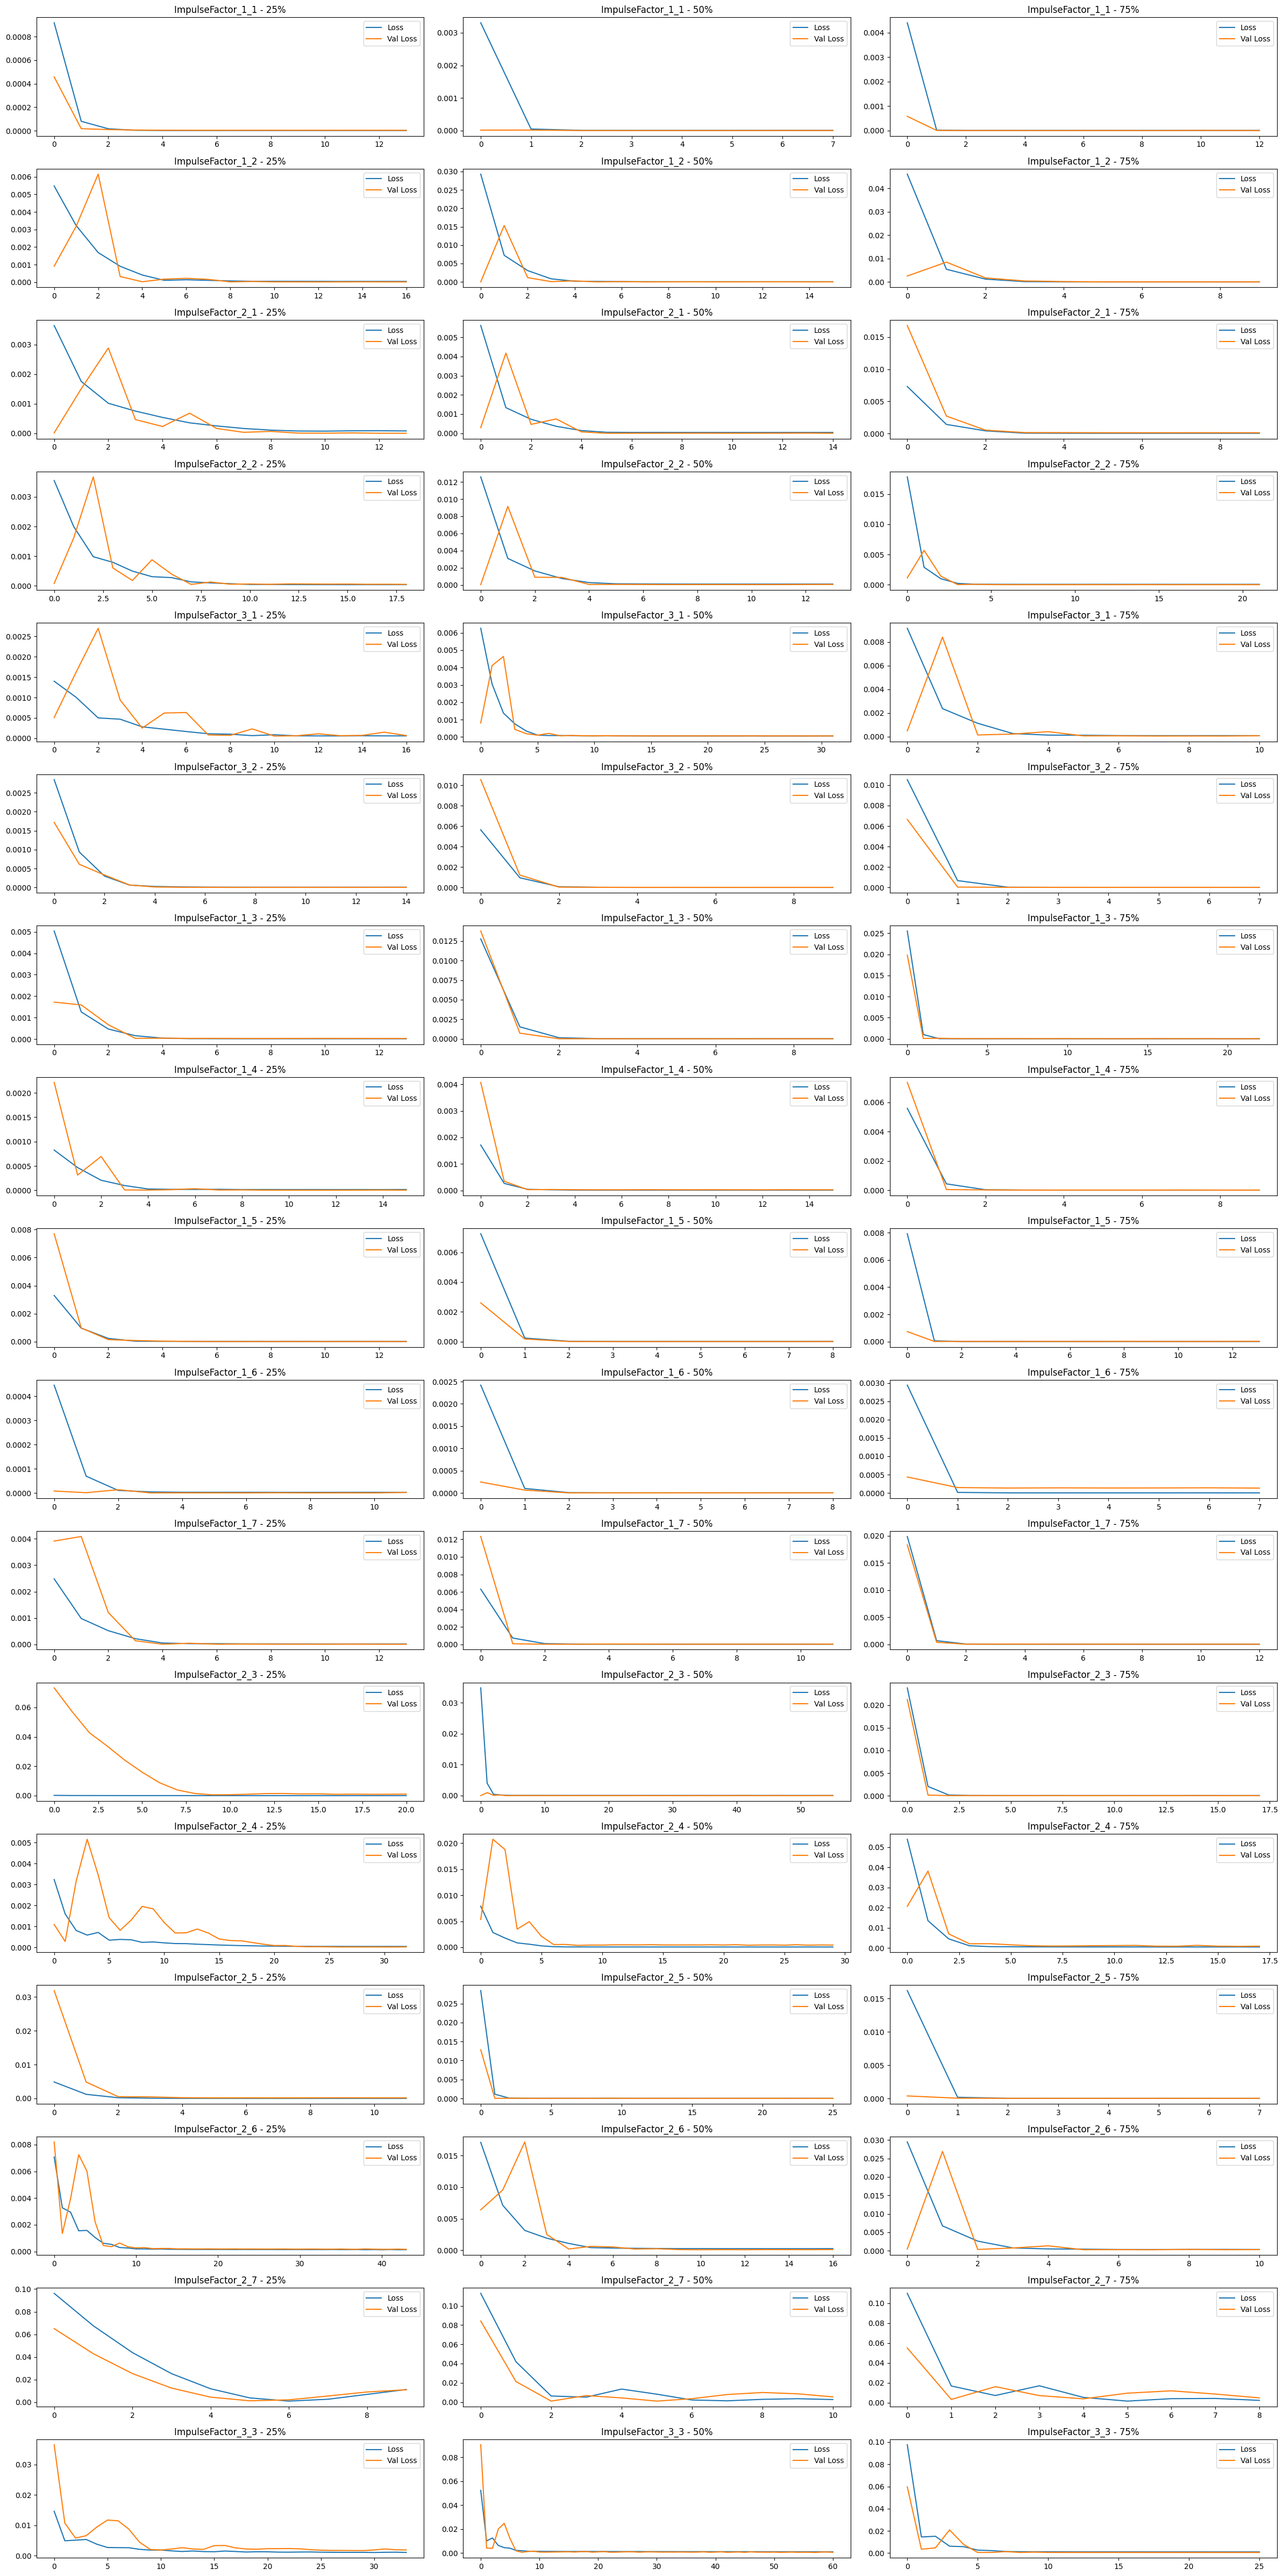

In [53]:
fig, axs = plt.subplots(len(GRU_dat), 3, figsize=(24, 48))

for i, bearing in enumerate(GRU_dat):
    bearing_id = list(bearing.keys())[0]
    bearing_losses = list(bearing.values())[0]

    for j, loss in enumerate(bearing_losses):

        train_loss = loss["loss"]
        val_loss = loss["val_loss"]

        axs[i, j].plot(train_loss, label='Loss')
        axs[i, j].plot(val_loss, label='Val Loss')
        axs[i, j].set_title(f"{bearing_id} - {(1 + j) * 25}%")
        axs[i, j].legend()

plt.tight_layout()
plt.show()

#### LSTM - GRU

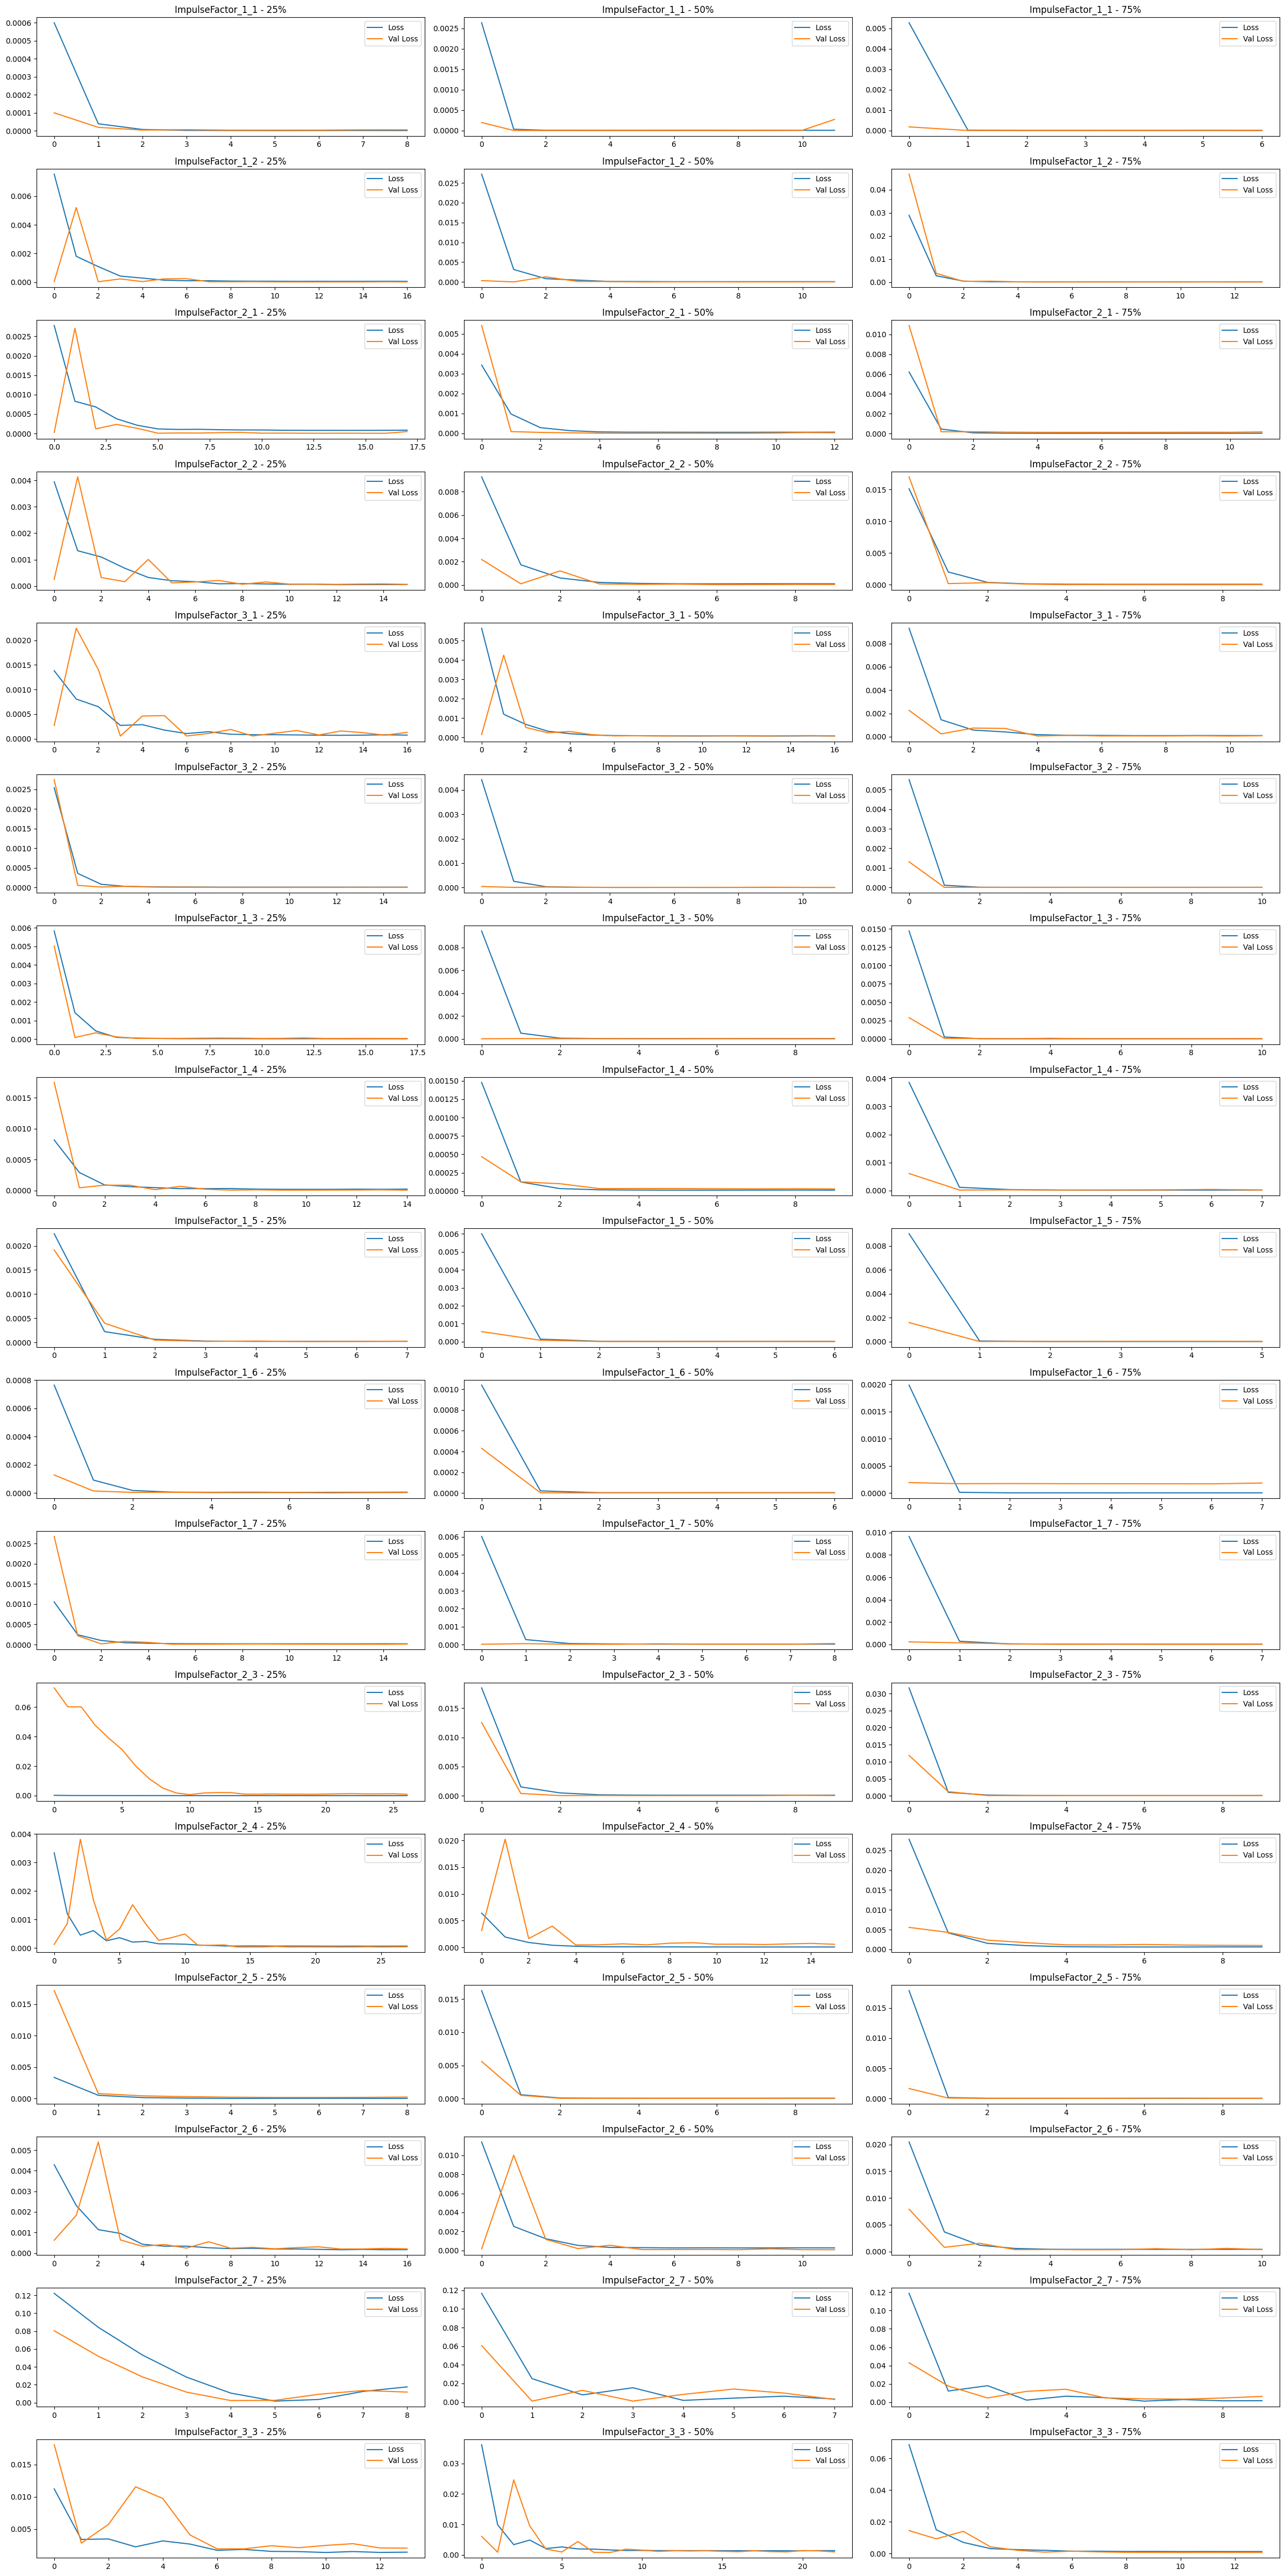

In [54]:
fig, axs = plt.subplots(len(LSTM_GRU_dat), 3, figsize=(24, 48))

for i, bearing in enumerate(LSTM_GRU_dat):
    bearing_id = list(bearing.keys())[0]
    bearing_losses = list(bearing.values())[0]

    for j, loss in enumerate(bearing_losses):

        train_loss = loss["loss"]
        val_loss = loss["val_loss"]

        axs[i, j].plot(train_loss, label='Loss')
        axs[i, j].plot(val_loss, label='Val Loss')
        axs[i, j].set_title(f"{bearing_id} - {(1 + j) * 25}%")
        axs[i, j].legend()

plt.tight_layout()
plt.show()

# Model - Wise performance comparision

#### load all scores

In [4]:
Poly_Reg_Logistic_dat = None
with open("./Performance_Dump/SASD RUL - Pronostia Dataset/Poly_Reg_Logistic.json") as json_file: Poly_Reg_Logistic_dat = json.load(json_file)

GPR_dat = None
with open("./Performance_Dump/SASD RUL - Pronostia Dataset/GPR_Logistic.json") as json_file: GPR_dat = json.load(json_file)

LSTM_dat = None
with open("./Performance_Dump/SASD RUL - Pronostia Dataset/LSTM.json") as json_file: LSTM_dat = json.load(json_file)

Stacked_LSTM_dat = None
with open("./Performance_Dump/SASD RUL - Pronostia Dataset/Stacked_LSTM.json") as json_file: Stacked_LSTM_dat = json.load(json_file)

GRU_dat = None
with open("./Performance_Dump/SASD RUL - Pronostia Dataset/GRU.json") as json_file: GRU_dat = json.load(json_file)

LSTM_GRU_dat = None
with open("./Performance_Dump/SASD RUL - Pronostia Dataset/LSTM_GRU.json") as json_file: LSTM_GRU_dat = json.load(json_file)

In [5]:
def getMetricScore(source: list, train_perc: int, score: str):
    dat = [list(x.values())[0][train_perc][score] for x in source]
    return dat

#### R2

25% Train

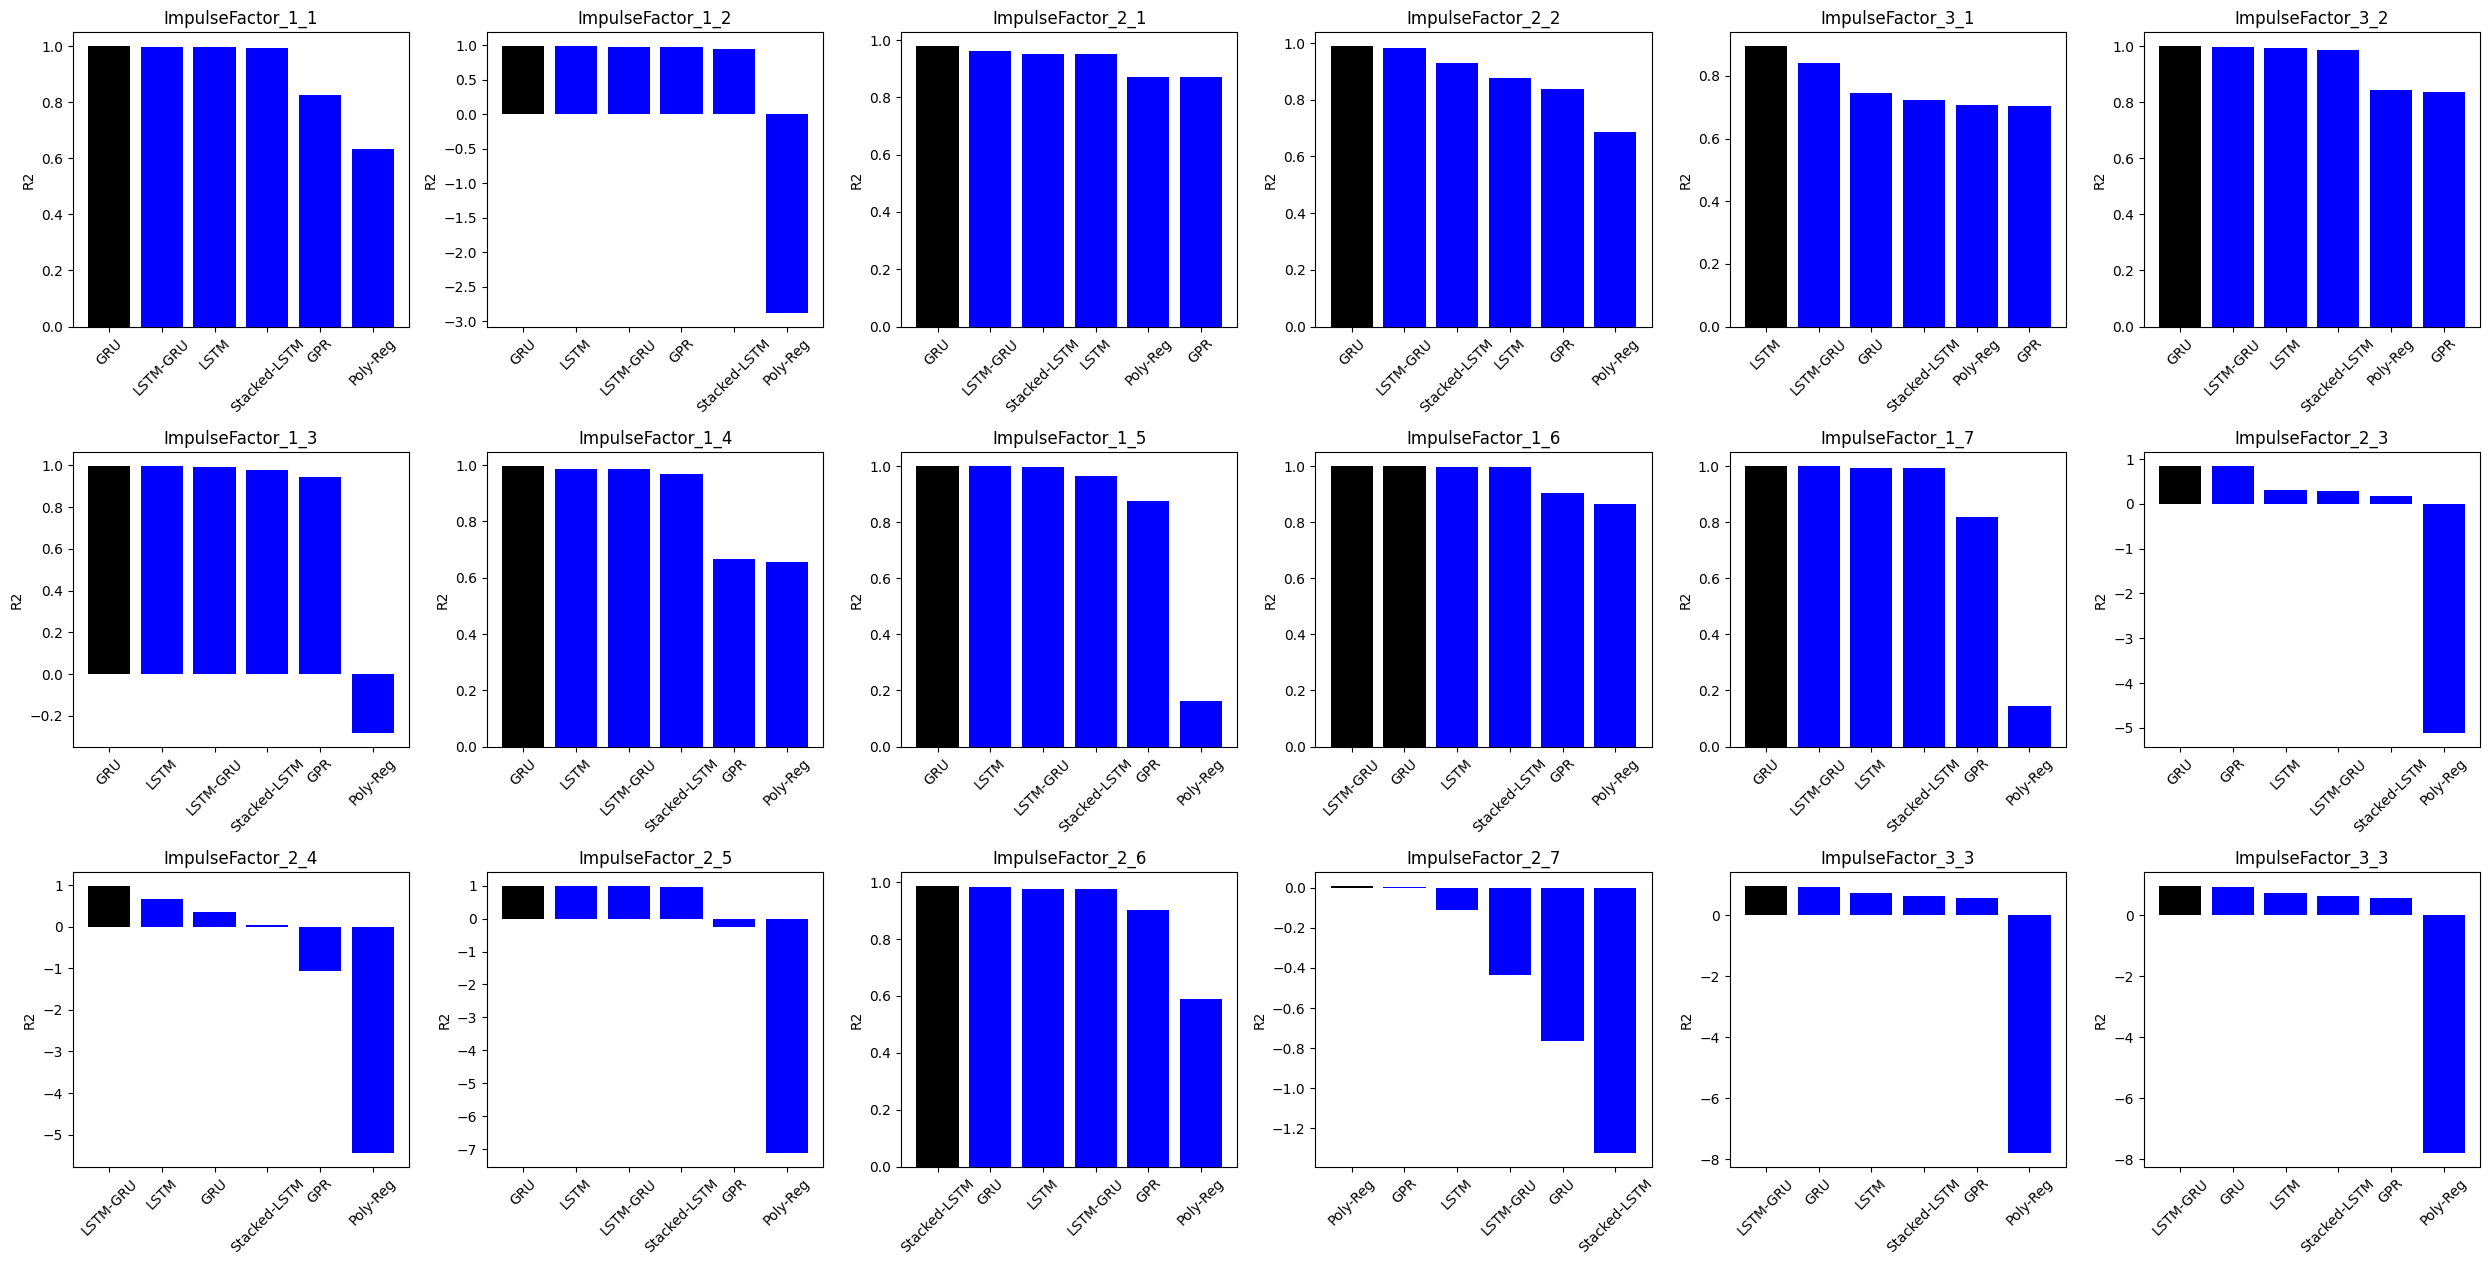

In [6]:
import matplotlib.pyplot as plt
import numpy as np

bearing_ids = [x for x in [list(y.keys())[0] for y in LSTM_dat]]
config = [0, "R2"]
r2_25_perc = {
    'Poly-Reg_Logistic': getMetricScore(Poly_Reg_Logistic_dat, config[0], config[1]),
    'GPR_Logistic': getMetricScore(GPR_dat, config[0], config[1]),
    'LSTM': getMetricScore(LSTM_dat, config[0], config[1]),
    'Stacked-LSTM': getMetricScore(Stacked_LSTM_dat, config[0], config[1]),
    'GRU': getMetricScore(GRU_dat, config[0], config[1]),
    'LSTM-GRU': getMetricScore(LSTM_GRU_dat, config[0], config[1]),
}

fig, axes = plt.subplots(3, 6, figsize=(25, 0.75*len(bearing_ids)))

for i in range(6):
    for j in range(3):
        ax = axes[j, i]
        index = min((j * 6) + i, 16)

        # sort models by 
        keys = list(r2_25_perc.keys())
        values = [d[index] for d in r2_25_perc.values()]
        zipped = zip(keys, values)
        sorted_zipped_arrays = sorted(zipped, key=lambda x: x[1], reverse=True)
        keys, values = zip(*sorted_zipped_arrays)

        highest_value = round(values[0], 3)  # Round off the highest value to 2 digits
        bar_colors = ['black' if round(value, 3) == highest_value else 'blue' for value in values]

        ax.bar(keys, values, color=bar_colors)
        ax.set_xticks(keys)
        ax.set_xticklabels([x.split("_")[0] for x in keys], rotation=45)
        ax.set_title(bearing_ids[index])
        ax.set_ylabel('R2')

plt.tight_layout()
plt.show()

50% Train

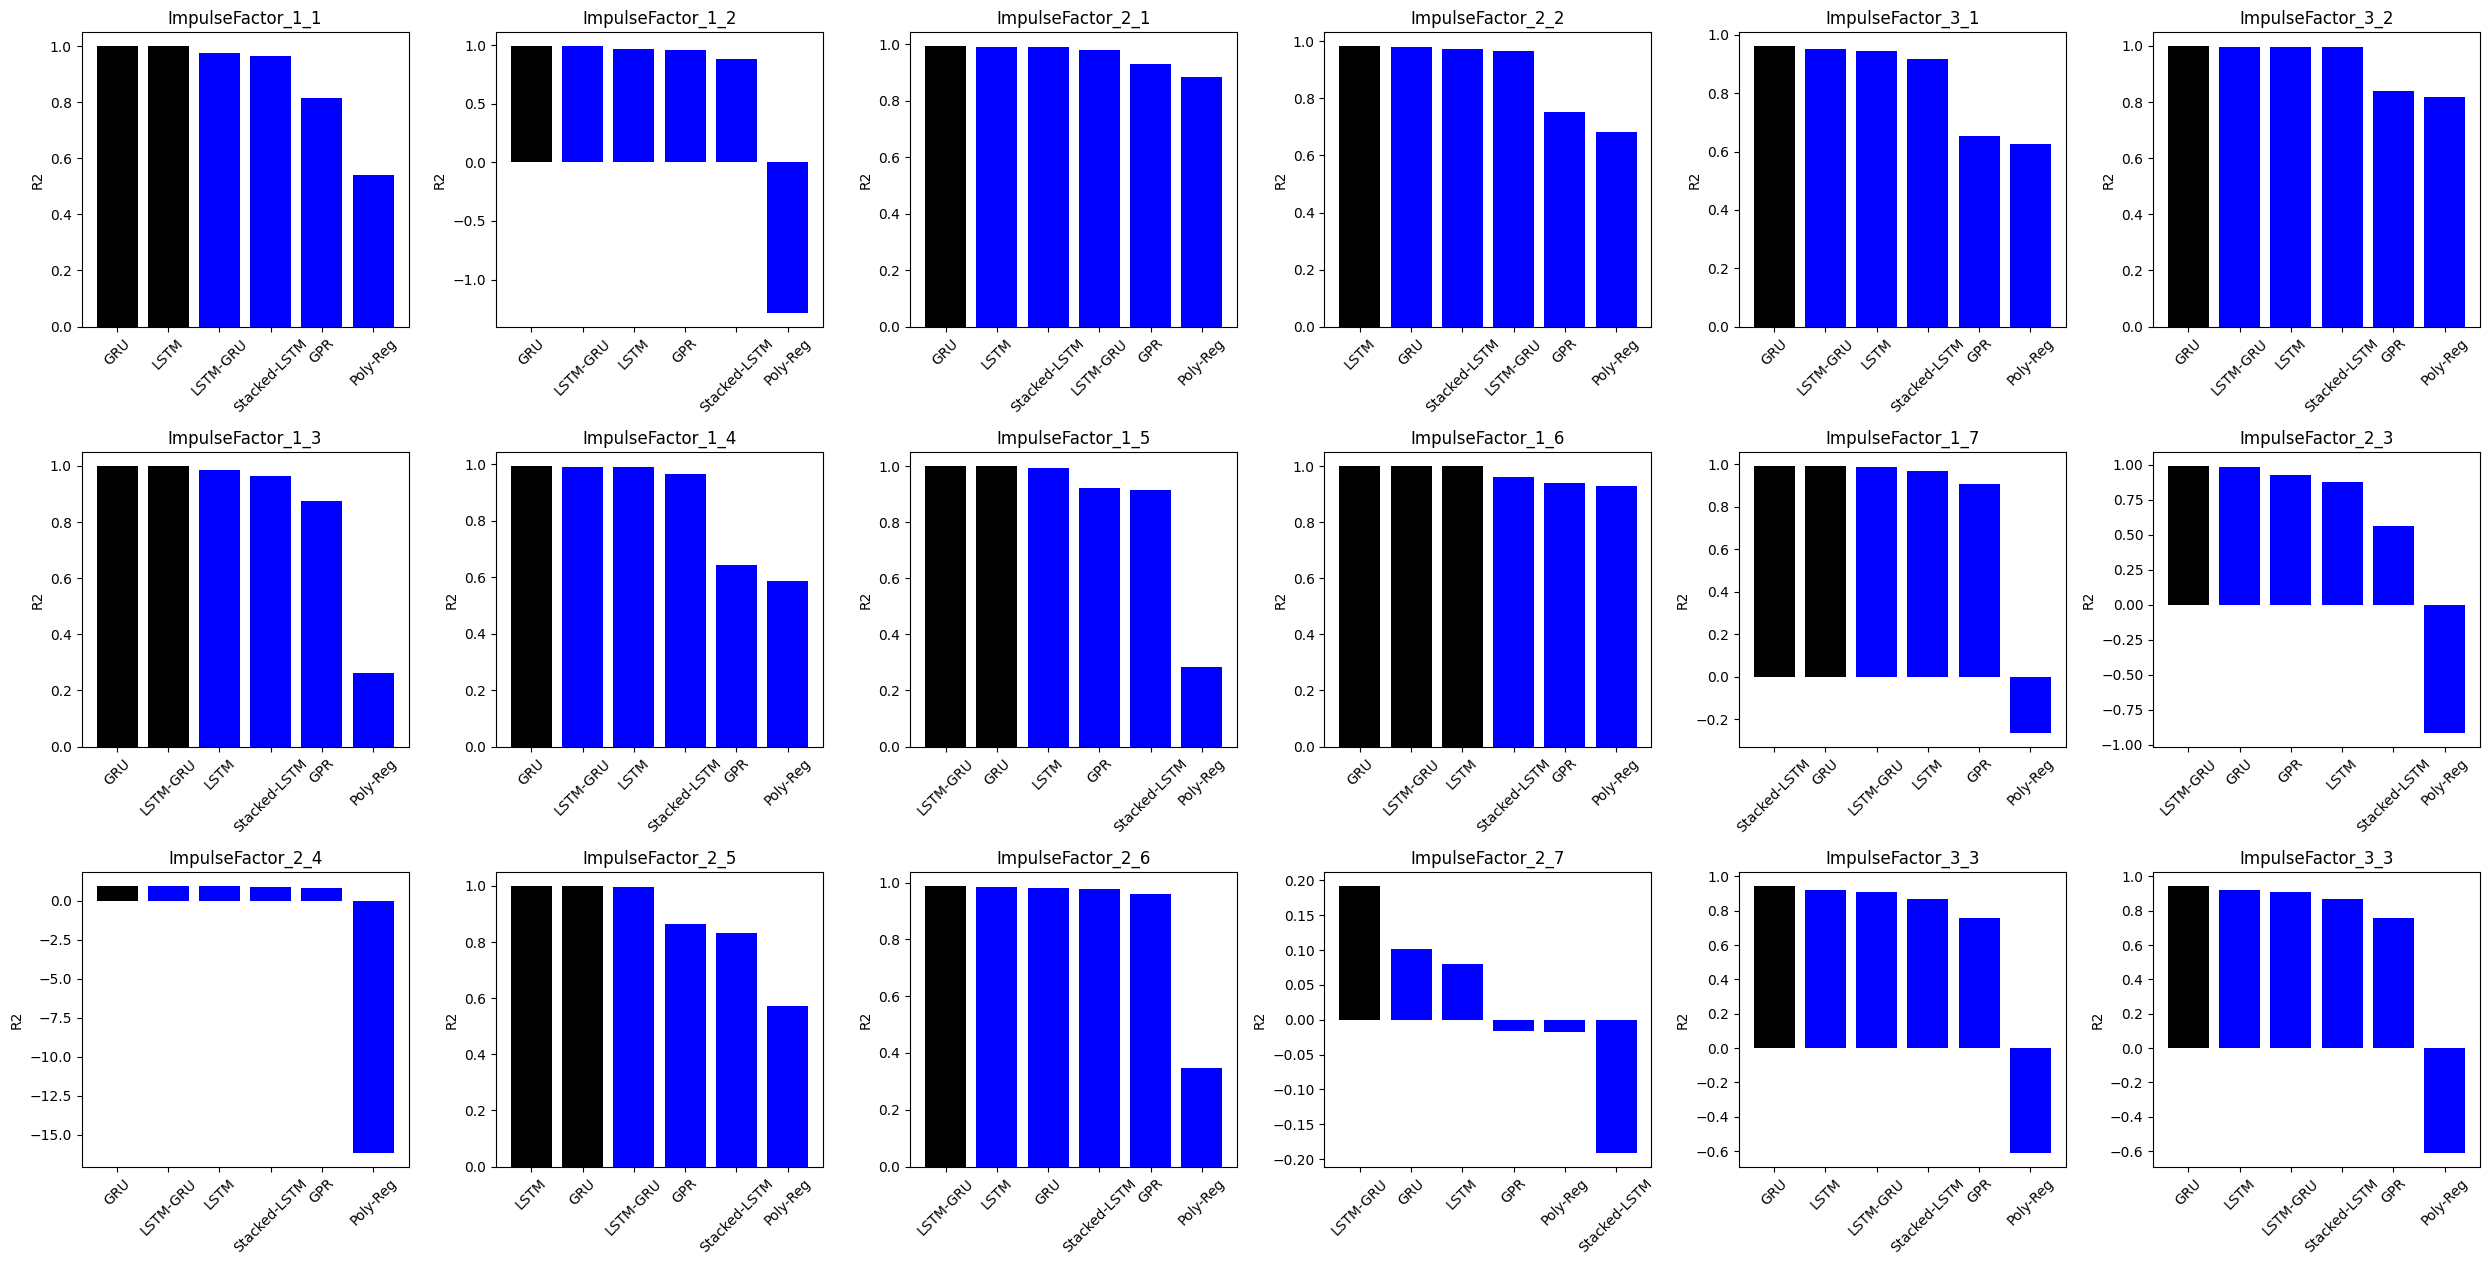

In [5]:
import matplotlib.pyplot as plt
import numpy as np

bearing_ids = [x for x in [list(y.keys())[0] for y in LSTM_dat]]
config = [1, "R2"]
r2_25_perc = {
    'Poly-Reg_Logistic': getMetricScore(Poly_Reg_Logistic_dat, config[0], config[1]),
    'GPR_Logistic': getMetricScore(GPR_dat, config[0], config[1]),
    'LSTM': getMetricScore(LSTM_dat, config[0], config[1]),
    'Stacked-LSTM': getMetricScore(Stacked_LSTM_dat, config[0], config[1]),
    'GRU': getMetricScore(GRU_dat, config[0], config[1]),
    'LSTM-GRU': getMetricScore(LSTM_GRU_dat, config[0], config[1]),
}

fig, axes = plt.subplots(3, 6, figsize=(25, 0.75*len(bearing_ids)))

for i in range(6):
    for j in range(3):
        ax = axes[j, i]
        index = min((j * 6) + i, 16)

        # sort models by 
        keys = list(r2_25_perc.keys())
        values = [d[index] for d in r2_25_perc.values()]
        zipped = zip(keys, values)
        sorted_zipped_arrays = sorted(zipped, key=lambda x: x[1], reverse=True)
        keys, values = zip(*sorted_zipped_arrays)

        highest_value = round(values[0], 3)  # Round off the highest value to 2 digits
        bar_colors = ['black' if round(value, 3) == highest_value else 'blue' for value in values]

        ax.bar(keys, values, color=bar_colors)
        ax.set_xticks(keys)
        ax.set_xticklabels([x.split("_")[0] for x in keys], rotation=45)
        ax.set_title(bearing_ids[index])
        ax.set_ylabel('R2')

plt.tight_layout()
plt.show()

75% Train

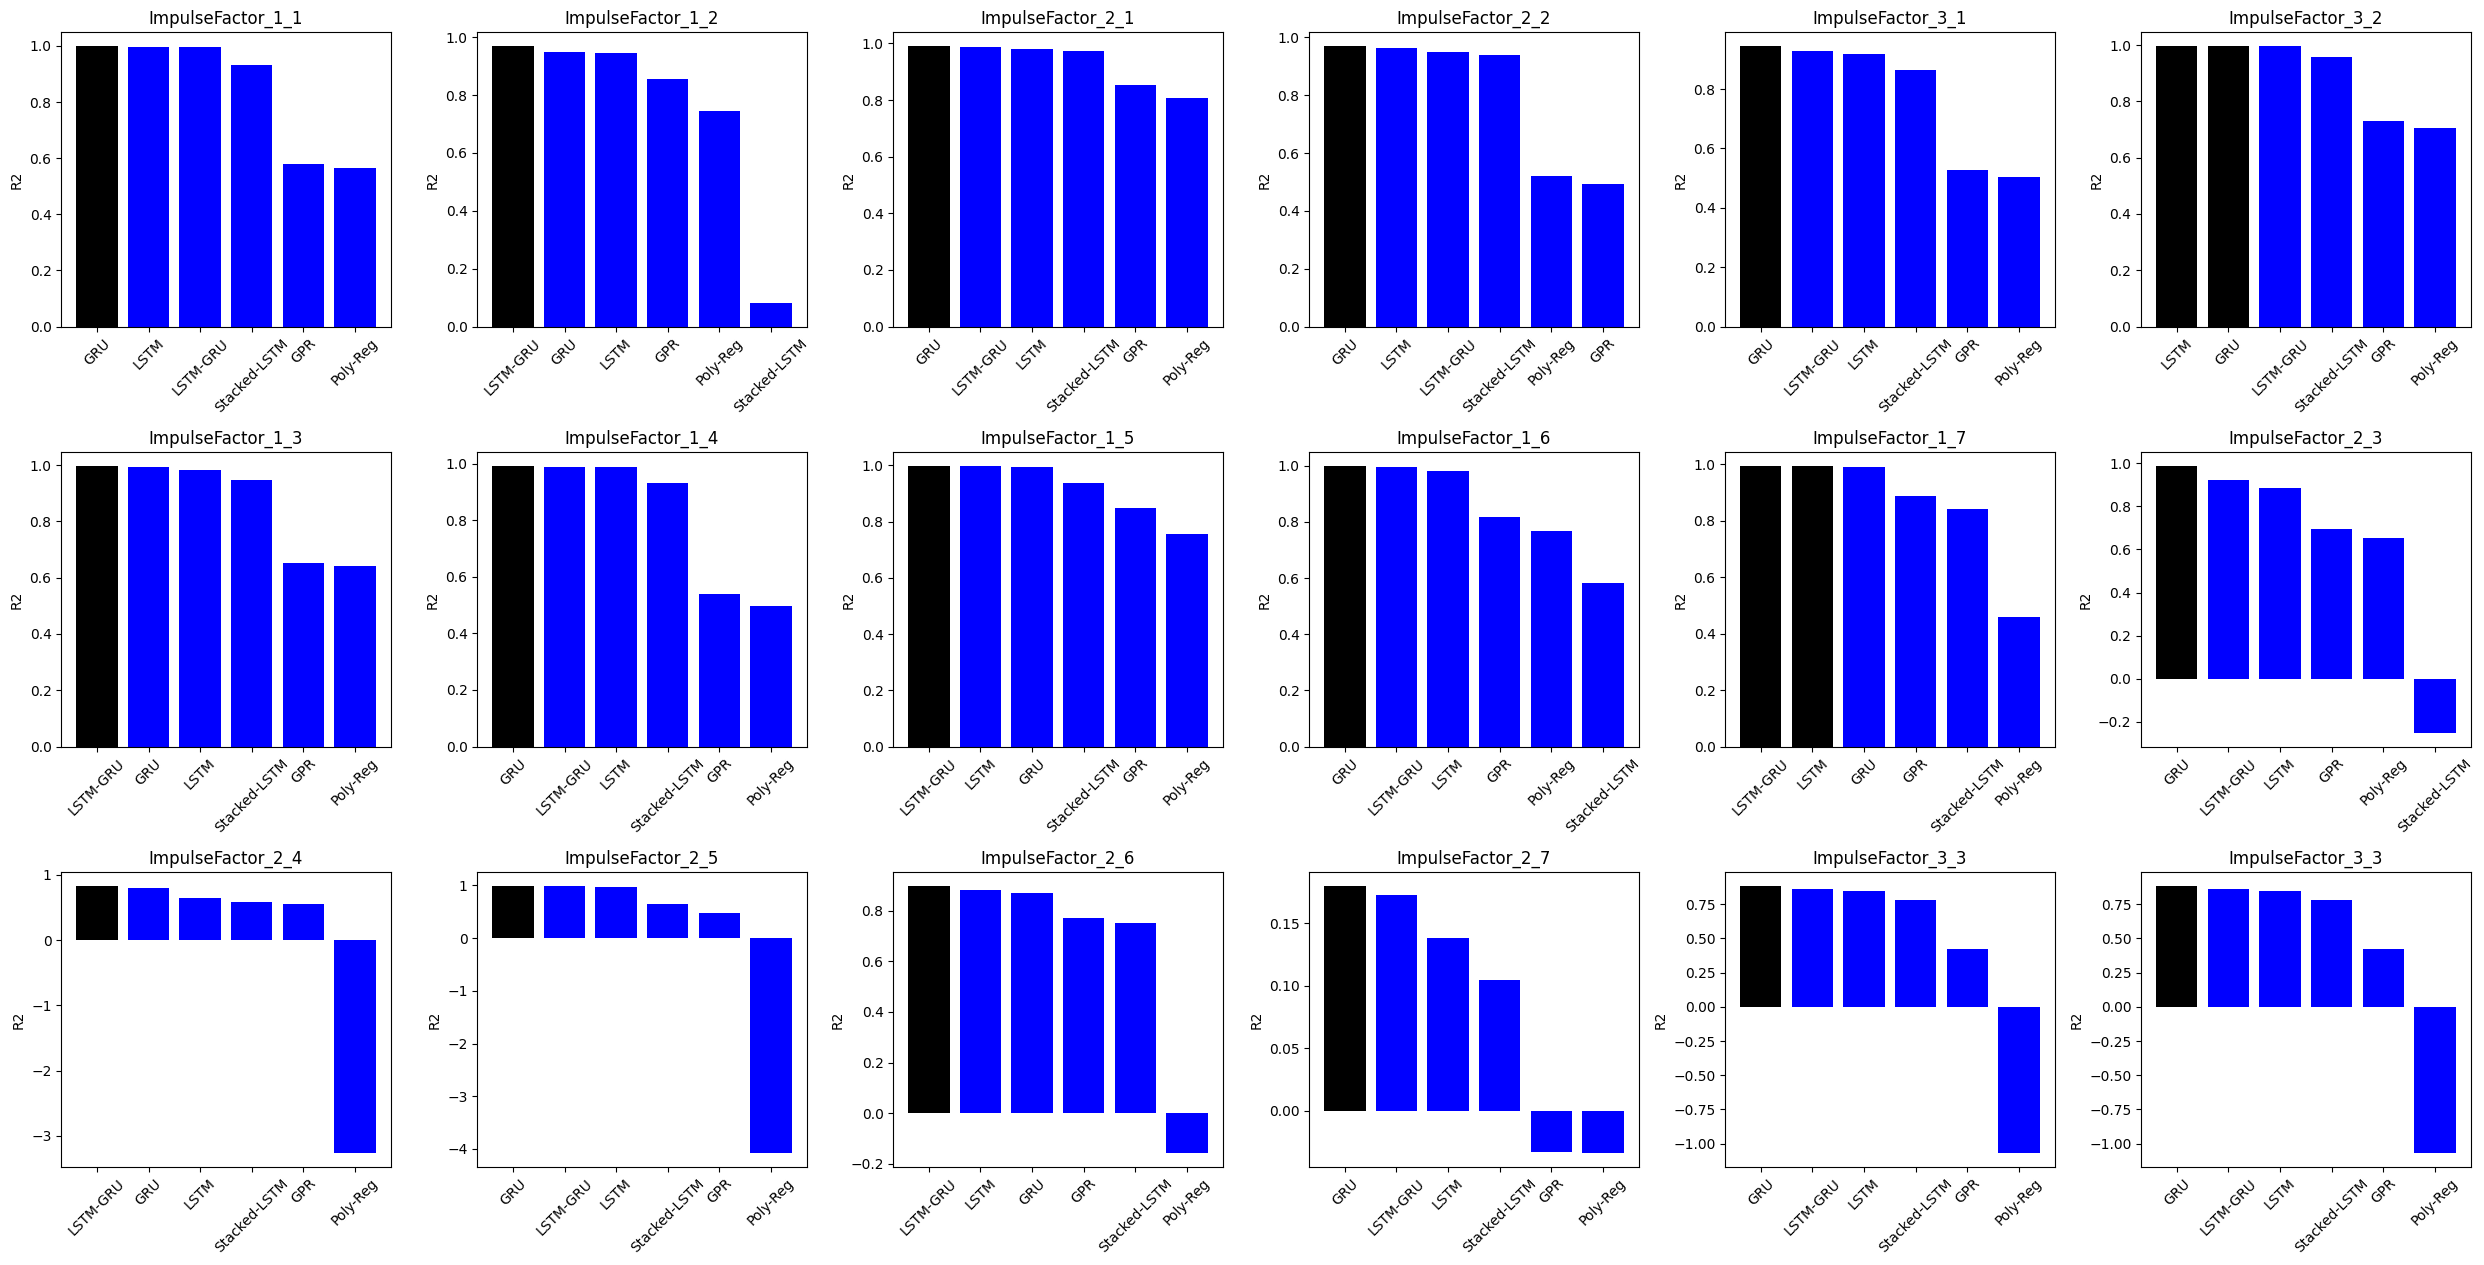

In [6]:
import matplotlib.pyplot as plt
import numpy as np

bearing_ids = [x for x in [list(y.keys())[0] for y in LSTM_dat]]
config = [2, "R2"]
r2_25_perc = {
    'Poly-Reg_Logistic': getMetricScore(Poly_Reg_Logistic_dat, config[0], config[1]),
    'GPR_Logistic': getMetricScore(GPR_dat, config[0], config[1]),
    'LSTM': getMetricScore(LSTM_dat, config[0], config[1]),
    'Stacked-LSTM': getMetricScore(Stacked_LSTM_dat, config[0], config[1]),
    'GRU': getMetricScore(GRU_dat, config[0], config[1]),
    'LSTM-GRU': getMetricScore(LSTM_GRU_dat, config[0], config[1]),
}

fig, axes = plt.subplots(3, 6, figsize=(25, 0.75*len(bearing_ids)))

for i in range(6):
    for j in range(3):
        ax = axes[j, i]
        index = min((j * 6) + i, 16)

        # sort models by 
        keys = list(r2_25_perc.keys())
        values = [d[index] for d in r2_25_perc.values()]
        zipped = zip(keys, values)
        sorted_zipped_arrays = sorted(zipped, key=lambda x: x[1], reverse=True)
        keys, values = zip(*sorted_zipped_arrays)

        highest_value = round(values[0], 3)  # Round off the highest value to 2 digits
        bar_colors = ['black' if round(value, 3) == highest_value else 'blue' for value in values]

        ax.bar(keys, values, color=bar_colors)
        ax.set_xticks(keys)
        ax.set_xticklabels([x.split("_")[0] for x in keys], rotation=45)
        ax.set_title(bearing_ids[index])
        ax.set_ylabel('R2')

plt.tight_layout()
plt.show()

#### RMSE

25% Train

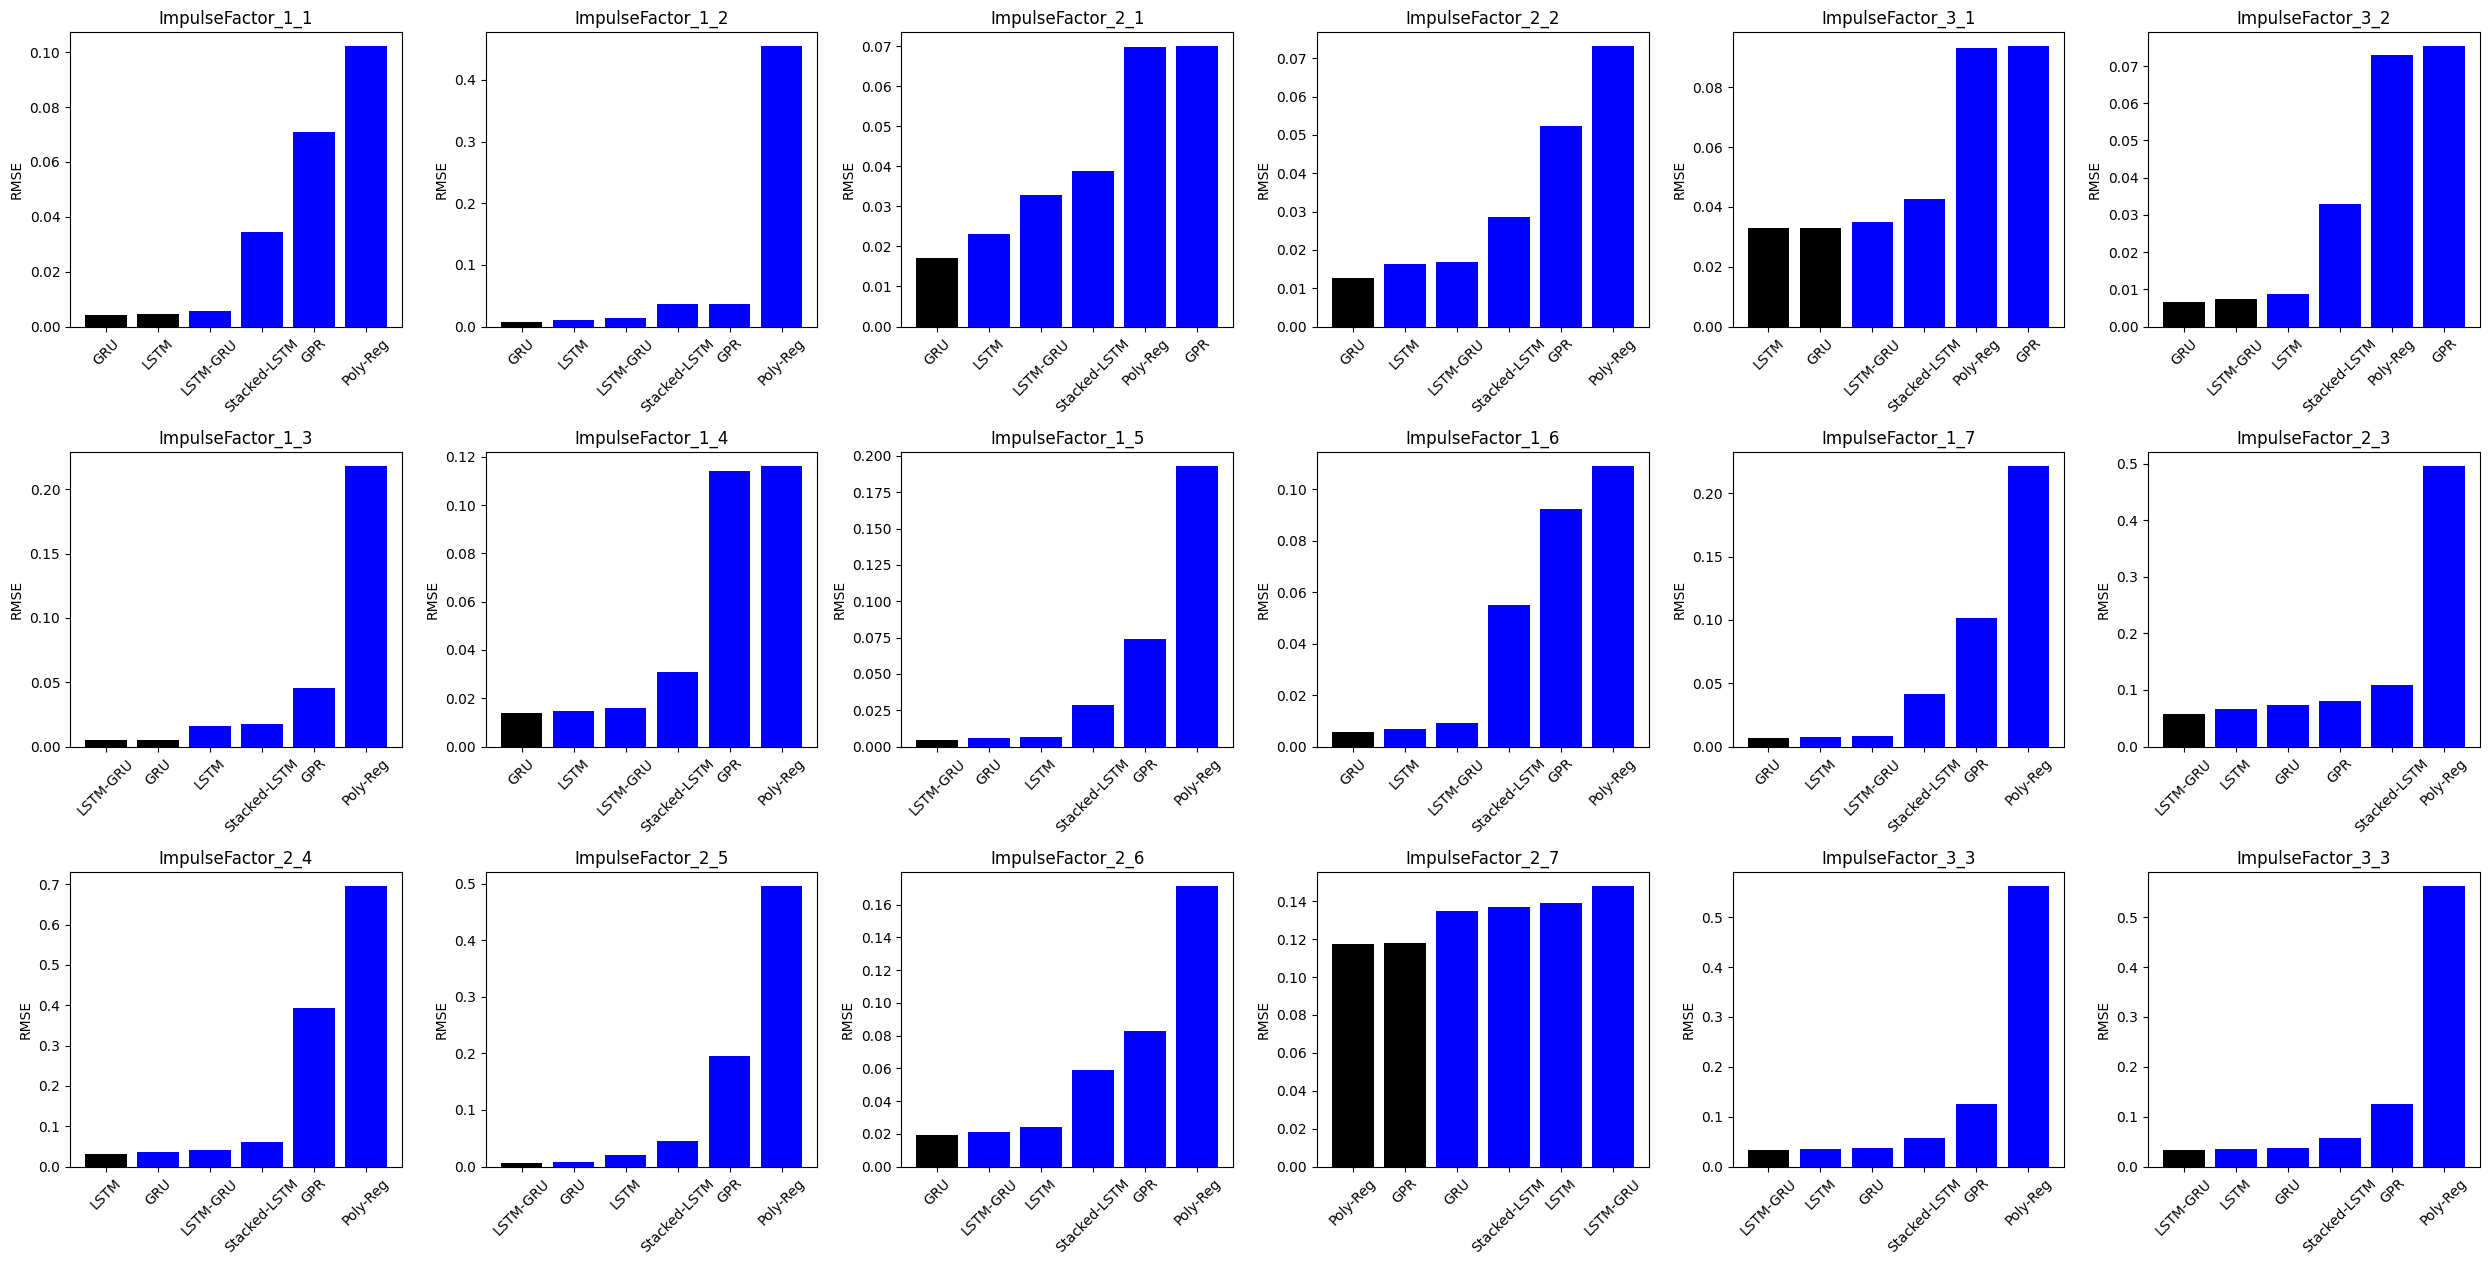

In [7]:
import matplotlib.pyplot as plt
import numpy as np

bearing_ids = [x for x in [list(y.keys())[0] for y in LSTM_dat]]
config = [0, "rmse"]
r2_25_perc = {
    'Poly-Reg_Logistic': getMetricScore(Poly_Reg_Logistic_dat, config[0], config[1]),
    'GPR_Logistic': getMetricScore(GPR_dat, config[0], config[1]),
    'LSTM': getMetricScore(LSTM_dat, config[0], config[1]),
    'Stacked-LSTM': getMetricScore(Stacked_LSTM_dat, config[0], config[1]),
    'GRU': getMetricScore(GRU_dat, config[0], config[1]),
    'LSTM-GRU': getMetricScore(LSTM_GRU_dat, config[0], config[1]),
}

fig, axes = plt.subplots(3, 6, figsize=(25, 0.75*len(bearing_ids)))

for i in range(6):
    for j in range(3):
        ax = axes[j, i]
        index = min((j * 6) + i, 16)

        # sort models by 
        keys = list(r2_25_perc.keys())
        values = [d[index] for d in r2_25_perc.values()]
        zipped = zip(keys, values)
        sorted_zipped_arrays = sorted(zipped, key=lambda x: x[1])
        keys, values = zip(*sorted_zipped_arrays)

        highest_value = round(values[0], 3)  # Round off the highest value to 2 digits
        bar_colors = ['black' if round(value, 3) == highest_value else 'blue' for value in values]

        ax.bar(keys, values, color=bar_colors)
        ax.set_xticks(keys)
        ax.set_xticklabels([x.split("_")[0] for x in keys], rotation=45)
        ax.set_title(bearing_ids[index])
        ax.set_ylabel('RMSE')

plt.tight_layout()
plt.show()

50% Train

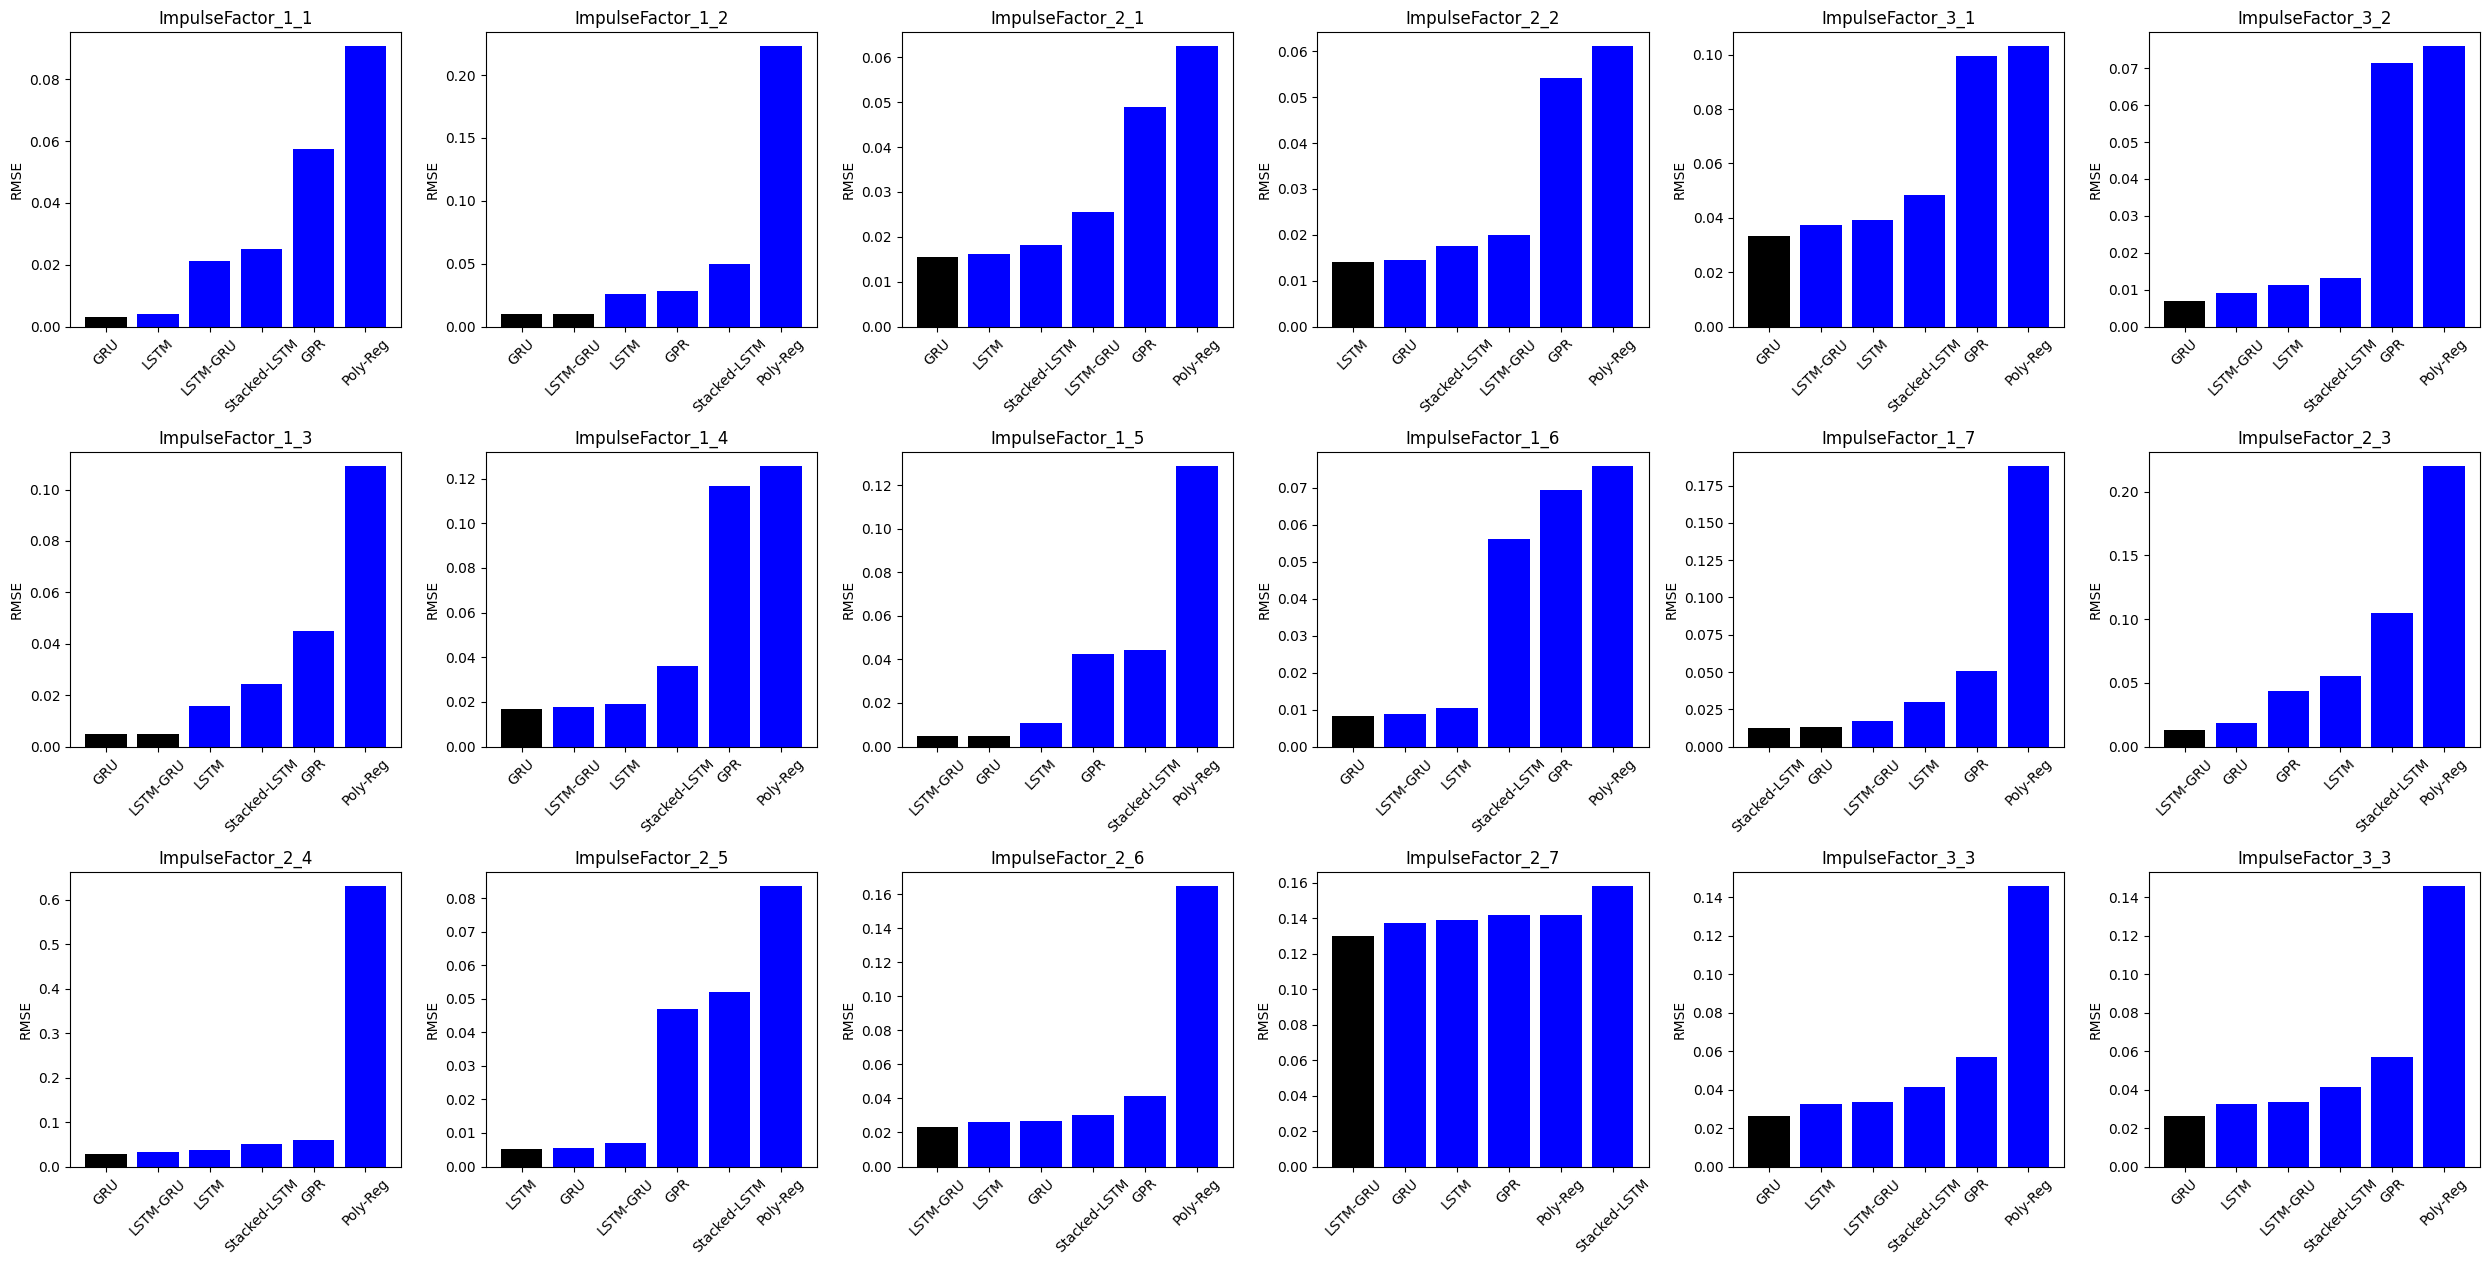

In [8]:
import matplotlib.pyplot as plt
import numpy as np

bearing_ids = [x for x in [list(y.keys())[0] for y in LSTM_dat]]
config = [1, "rmse"]
r2_25_perc = {
    'Poly-Reg_Logistic': getMetricScore(Poly_Reg_Logistic_dat, config[0], config[1]),
    'GPR_Logistic': getMetricScore(GPR_dat, config[0], config[1]),
    'LSTM': getMetricScore(LSTM_dat, config[0], config[1]),
    'Stacked-LSTM': getMetricScore(Stacked_LSTM_dat, config[0], config[1]),
    'GRU': getMetricScore(GRU_dat, config[0], config[1]),
    'LSTM-GRU': getMetricScore(LSTM_GRU_dat, config[0], config[1]),
}

fig, axes = plt.subplots(3, 6, figsize=(25, 0.75*len(bearing_ids)))

for i in range(6):
    for j in range(3):
        ax = axes[j, i]
        index = min((j * 6) + i, 16)

        # sort models by 
        keys = list(r2_25_perc.keys())
        values = [d[index] for d in r2_25_perc.values()]
        zipped = zip(keys, values)
        sorted_zipped_arrays = sorted(zipped, key=lambda x: x[1])
        keys, values = zip(*sorted_zipped_arrays)

        highest_value = round(values[0], 3)  # Round off the highest value to 2 digits
        bar_colors = ['black' if round(value, 3) == highest_value else 'blue' for value in values]

        ax.bar(keys, values, color=bar_colors)
        ax.set_xticks(keys)
        ax.set_xticklabels([x.split("_")[0] for x in keys], rotation=45)
        ax.set_title(bearing_ids[index])
        ax.set_ylabel('RMSE')

plt.tight_layout()
plt.show()

75% Train

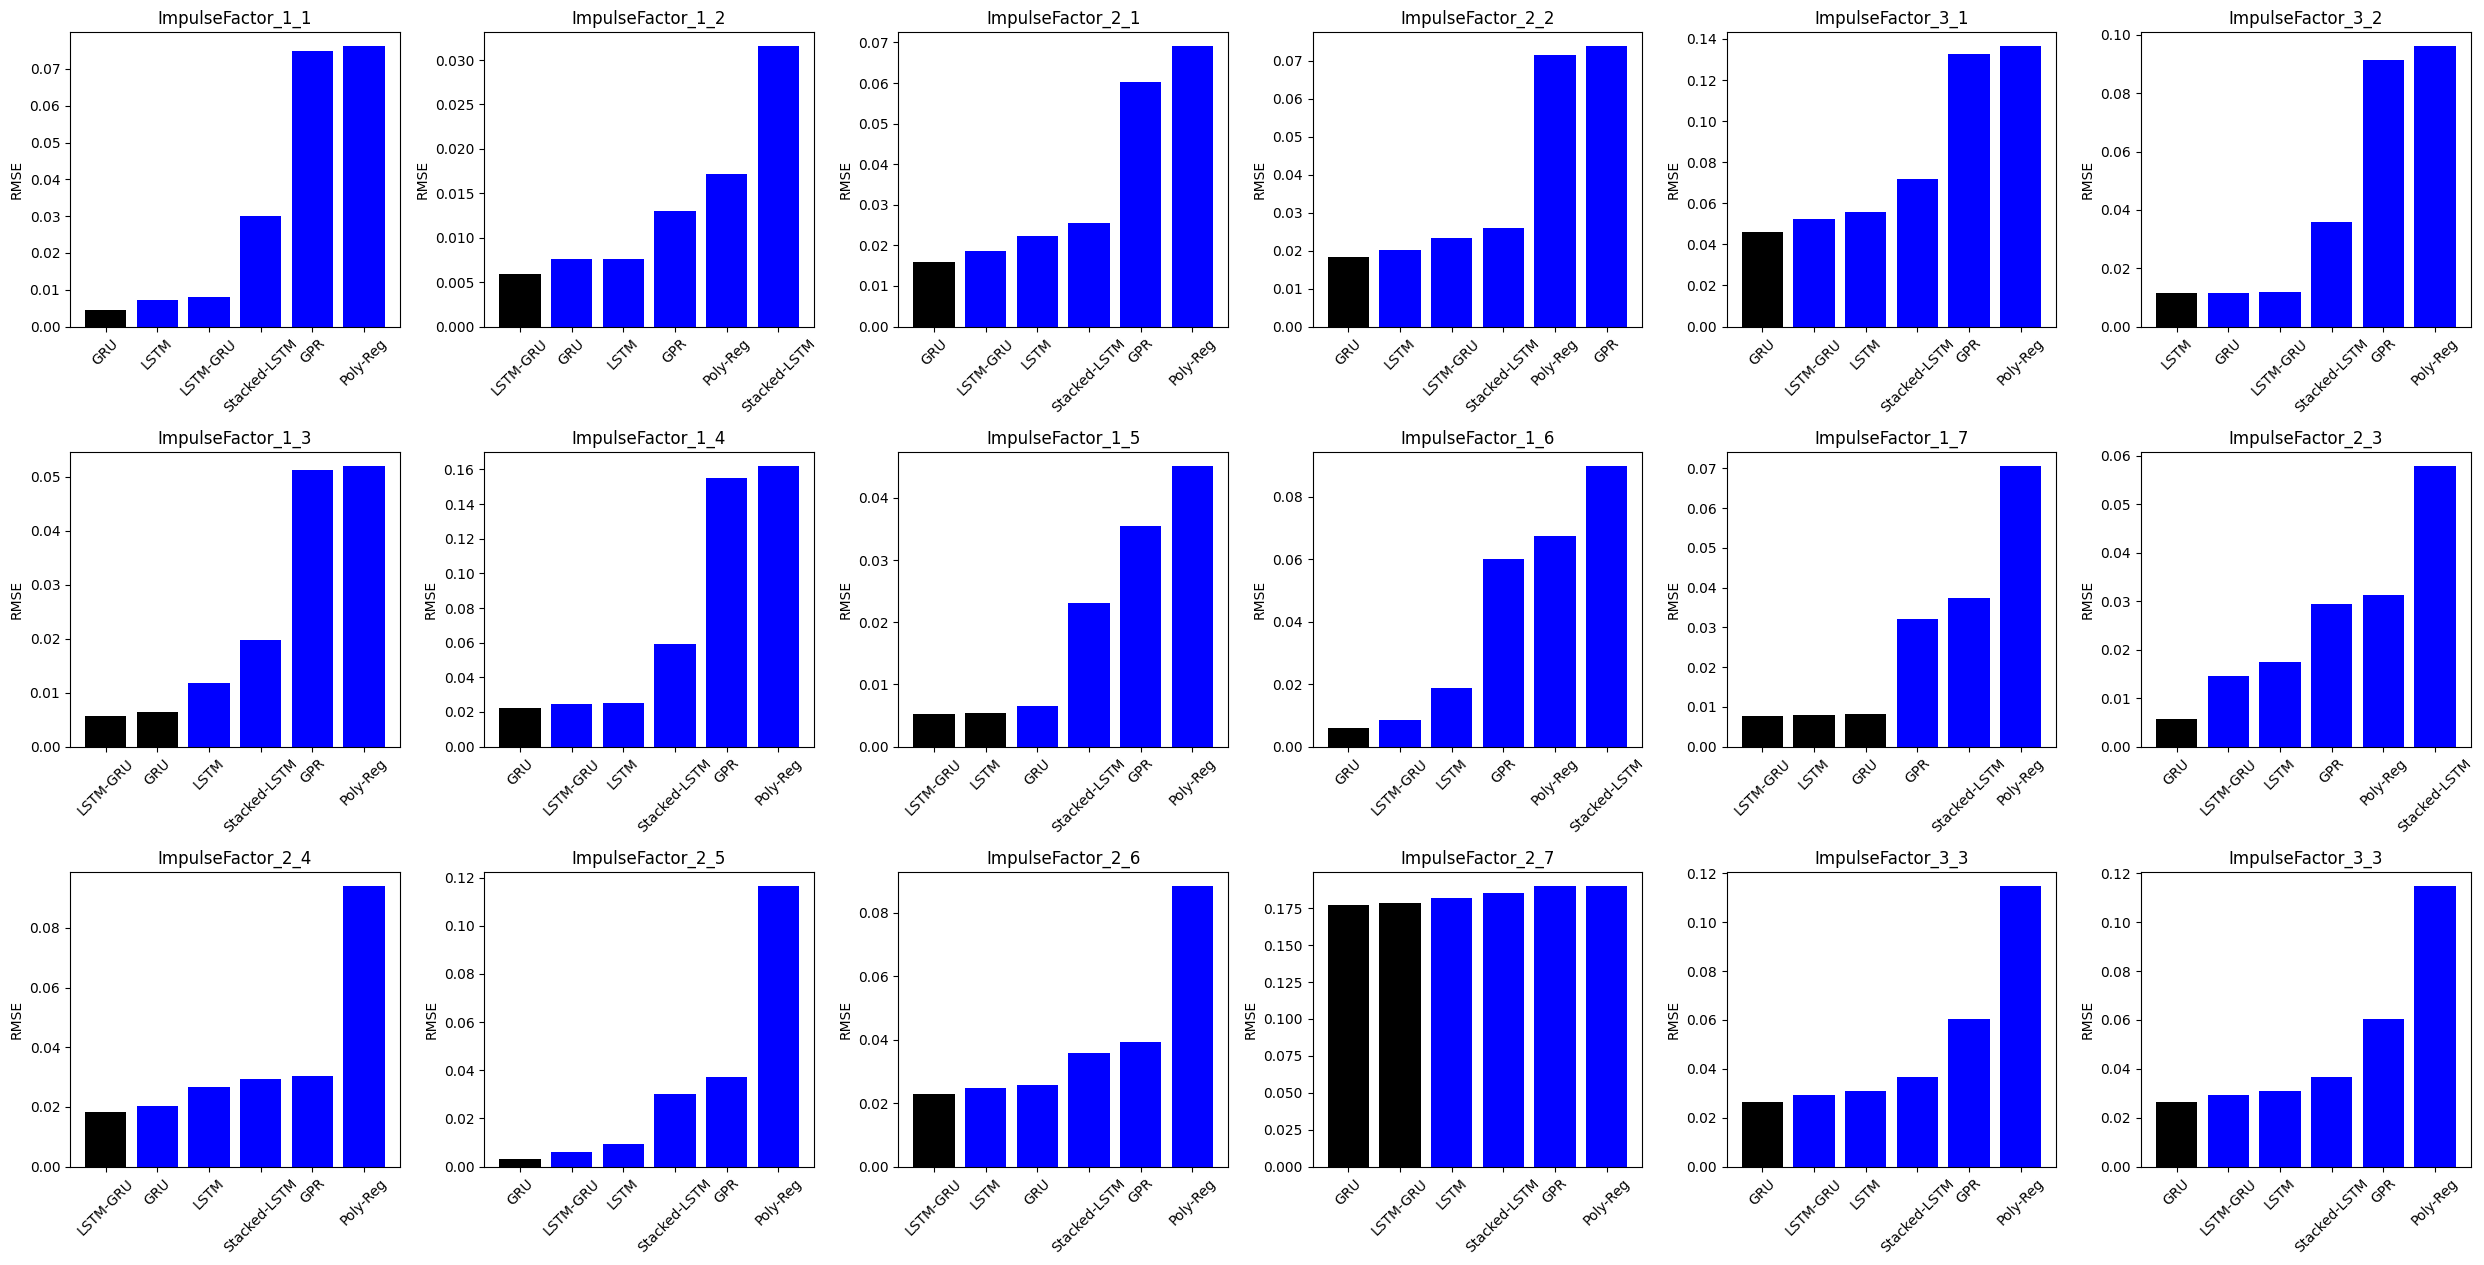

In [9]:
import matplotlib.pyplot as plt
import numpy as np

bearing_ids = [x for x in [list(y.keys())[0] for y in LSTM_dat]]
config = [2, "rmse"]
r2_25_perc = {
    'Poly-Reg_Logistic': getMetricScore(Poly_Reg_Logistic_dat, config[0], config[1]),
    'GPR_Logistic': getMetricScore(GPR_dat, config[0], config[1]),
    'LSTM': getMetricScore(LSTM_dat, config[0], config[1]),
    'Stacked-LSTM': getMetricScore(Stacked_LSTM_dat, config[0], config[1]),
    'GRU': getMetricScore(GRU_dat, config[0], config[1]),
    'LSTM-GRU': getMetricScore(LSTM_GRU_dat, config[0], config[1]),
}

fig, axes = plt.subplots(3, 6, figsize=(25, 0.75*len(bearing_ids)))

for i in range(6):
    for j in range(3):
        ax = axes[j, i]
        index = min((j * 6) + i, 16)

        # sort models by 
        keys = list(r2_25_perc.keys())
        values = [d[index] for d in r2_25_perc.values()]
        zipped = zip(keys, values)
        sorted_zipped_arrays = sorted(zipped, key=lambda x: x[1])
        keys, values = zip(*sorted_zipped_arrays)

        highest_value = round(values[0], 3)  # Round off the highest value to 2 digits
        bar_colors = ['black' if round(value, 3) == highest_value else 'blue' for value in values]

        ax.bar(keys, values, color=bar_colors)
        ax.set_xticks(keys)
        ax.set_xticklabels([x.split("_")[0] for x in keys], rotation=45)
        ax.set_title(bearing_ids[index])
        ax.set_ylabel('RMSE')

plt.tight_layout()
plt.show()

#### Average Ranks

               Model  Average Rank
5                GRU      5.254902
2           LSTM-GRU      4.372549
4               LSTM      4.333333
3       Stacked-LSTM      3.392157
1       GPR_Logistic      2.156863
0  Poly-Reg_Logistic      1.490196


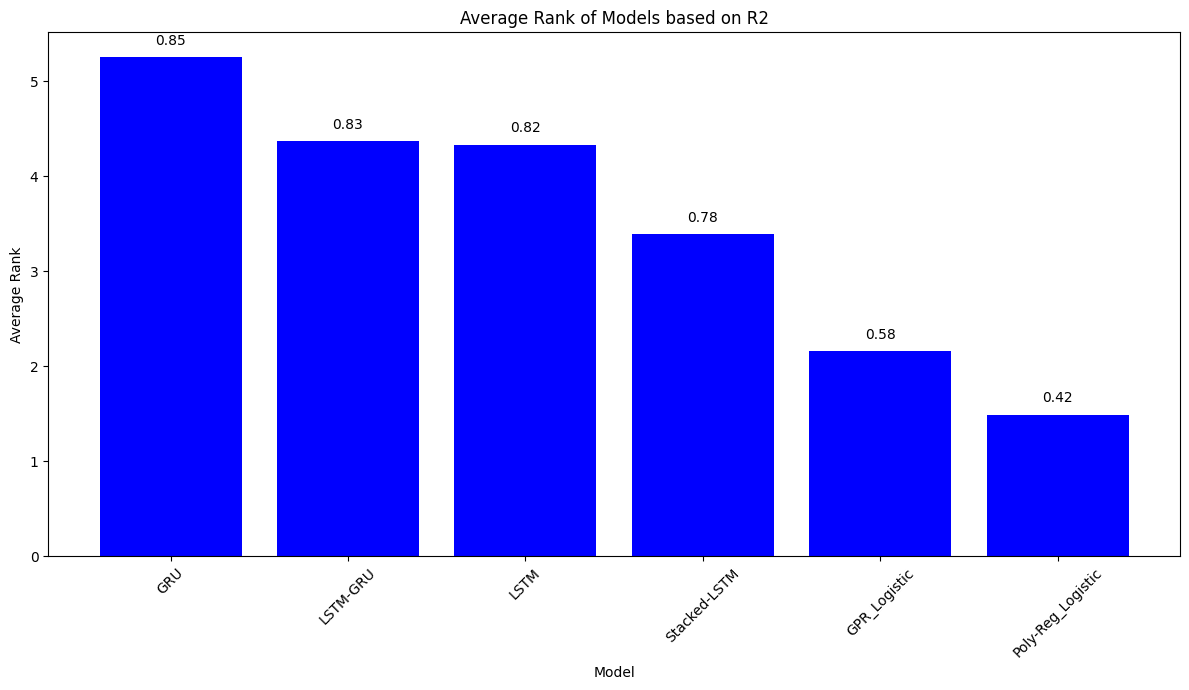

In [9]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Function to extract RMSE scores
def getMetricScore(source: list, train_perc: int, score: str):
    return [list(x.values())[0][train_perc][score] for x in source]

# Load the data
def load_json(file_path):
    with open(file_path) as json_file:
        return json.load(json_file)

Poly_Reg_Logistic_dat = load_json("./Performance_Dump/SASD RUL - Pronostia Dataset/Poly_Reg_Logistic.json")
GPR_dat = load_json("./Performance_Dump/SASD RUL - Pronostia Dataset/GPR_Logistic.json")
LSTM_dat = load_json("./Performance_Dump/SASD RUL - Pronostia Dataset/LSTM.json")
Stacked_LSTM_dat = load_json("./Performance_Dump/SASD RUL - Pronostia Dataset/Stacked_LSTM.json")
GRU_dat = load_json("./Performance_Dump/SASD RUL - Pronostia Dataset/GRU.json")
LSTM_GRU_dat = load_json("./Performance_Dump/SASD RUL - Pronostia Dataset/LSTM_GRU.json")

bearing_ids = [list(y.keys())[0] for y in LSTM_dat]

# Extract RMSE scores for 25%, 50%, and 75% train data
configurations = [(0, "pro_score"), (1, "pro_score"), (2, "pro_score")]
all_rmse_scores = []

for config in configurations:
    rmse_scores = {
        'Poly-Reg_Logistic': getMetricScore(Poly_Reg_Logistic_dat, config[0], config[1]),
        'GPR_Logistic': getMetricScore(GPR_dat, config[0], config[1]),
        'LSTM': getMetricScore(LSTM_dat, config[0], config[1]),
        'Stacked-LSTM': getMetricScore(Stacked_LSTM_dat, config[0], config[1]),
        'GRU': getMetricScore(GRU_dat, config[0], config[1]),
        'LSTM-GRU': getMetricScore(LSTM_GRU_dat, config[0], config[1]),
    }
    all_rmse_scores.append(rmse_scores)

# Calculate ranks for each configuration
ranks = []
for rmse_scores in all_rmse_scores:
    config_ranks = {}
    for i, bearing_id in enumerate(bearing_ids):
        scores = {model: rmse_scores[model][i] for model in rmse_scores}
        sorted_models = sorted(scores, key=scores.get)
        for rank, model in enumerate(sorted_models):
            if model not in config_ranks:
                config_ranks[model] = []
            config_ranks[model].append(rank + 1)
    ranks.append(config_ranks)

# Calculate average rank for each model
average_ranks = {}
for model in ranks[0]:
    model_ranks = [rank[model] for rank in ranks]
    average_ranks[model] = np.mean([item for sublist in model_ranks for item in sublist])

# Calculate average RMSE for each model
average_rmse = {}
for model in all_rmse_scores[0]:
    all_scores = [rmse_scores[model] for rmse_scores in all_rmse_scores]
    flat_scores = [item for sublist in all_scores for item in sublist]
    average_rmse[model] = np.mean(flat_scores)

# Convert to DataFrame for better visualization
df = pd.DataFrame(list(average_ranks.items()), columns=['Model', 'Average Rank'])
df = df.sort_values(by='Average Rank', ascending=False)

# Plotting the average ranks with average RMSE annotations
plt.figure(figsize=(12, 7))
bars = plt.bar(df['Model'], df['Average Rank'], color='blue')
plt.xlabel('Model')
plt.ylabel('Average Rank')
plt.title('Average Rank of Models based on R2')
plt.xticks(rotation=45)

# Adding average RMSE annotations above the bars
for bar, model in zip(bars, df['Model']):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.1, f'{average_rmse[model]:.2f}', 
             ha='center', va='bottom')

print(df)

plt.tight_layout()
plt.show()


               Model  Average Rank
5                GRU      5.431373
3           LSTM-GRU      4.823529
4               LSTM      4.470588
2       Stacked-LSTM      2.784314
1       GPR_Logistic      2.235294
0  Poly-Reg_Logistic      1.254902


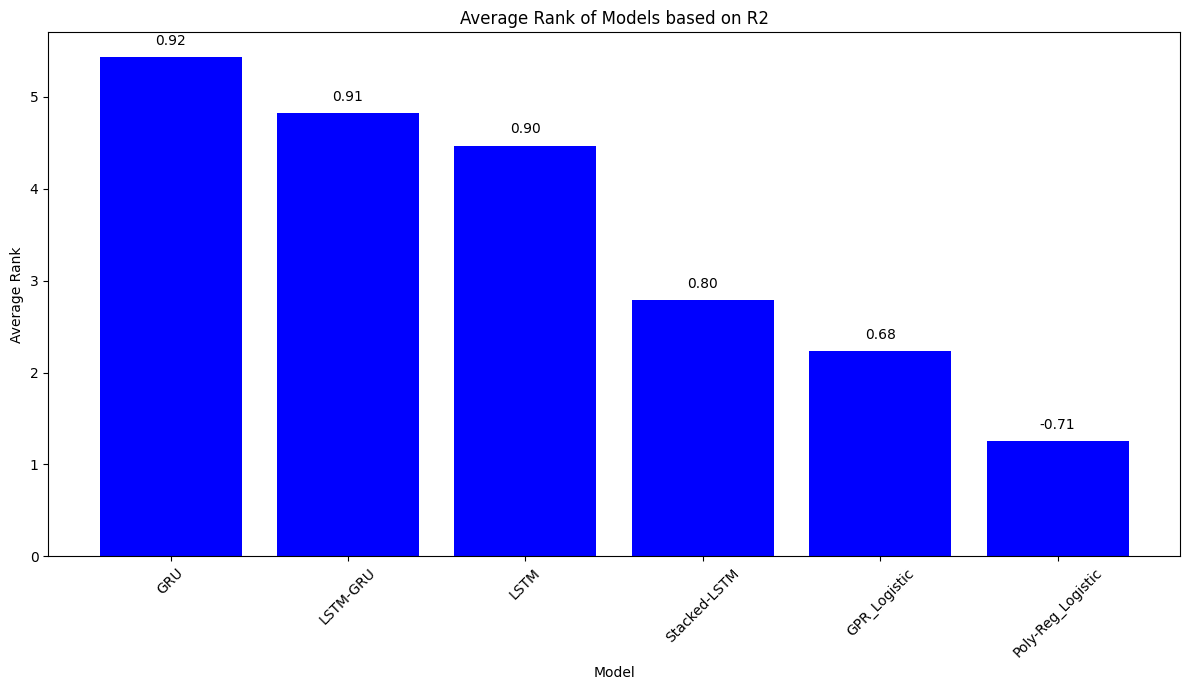

In [8]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Function to extract RMSE scores
def getMetricScore(source: list, train_perc: int, score: str):
    return [list(x.values())[0][train_perc][score] for x in source]

# Load the data
def load_json(file_path):
    with open(file_path) as json_file:
        return json.load(json_file)

Poly_Reg_Logistic_dat = load_json("./Performance_Dump/SASD RUL - Pronostia Dataset/Poly_Reg_Logistic.json")
GPR_dat = load_json("./Performance_Dump/SASD RUL - Pronostia Dataset/GPR_Logistic.json")
LSTM_dat = load_json("./Performance_Dump/SASD RUL - Pronostia Dataset/LSTM.json")
Stacked_LSTM_dat = load_json("./Performance_Dump/SASD RUL - Pronostia Dataset/Stacked_LSTM.json")
GRU_dat = load_json("./Performance_Dump/SASD RUL - Pronostia Dataset/GRU.json")
LSTM_GRU_dat = load_json("./Performance_Dump/SASD RUL - Pronostia Dataset/LSTM_GRU.json")

bearing_ids = [list(y.keys())[0] for y in LSTM_dat]

# Extract RMSE scores for 25%, 50%, and 75% train data
configurations = [(0, "rmse"), (1, "rmse"), (2, "rmse")]
all_rmse_scores = []

for config in configurations:
    rmse_scores = {
        'Poly-Reg_Logistic': getMetricScore(Poly_Reg_Logistic_dat, config[0], config[1]),
        'GPR_Logistic': getMetricScore(GPR_dat, config[0], config[1]),
        'LSTM': getMetricScore(LSTM_dat, config[0], config[1]),
        'Stacked-LSTM': getMetricScore(Stacked_LSTM_dat, config[0], config[1]),
        'GRU': getMetricScore(GRU_dat, config[0], config[1]),
        'LSTM-GRU': getMetricScore(LSTM_GRU_dat, config[0], config[1]),
    }
    all_rmse_scores.append(rmse_scores)

# Calculate ranks for each configuration
ranks = []
for rmse_scores in all_rmse_scores:
    config_ranks = {}
    for i, bearing_id in enumerate(bearing_ids):
        scores = {model: rmse_scores[model][i] for model in rmse_scores}
        sorted_models = sorted(scores, key=scores.get)
        for rank, model in enumerate(sorted_models):
            if model not in config_ranks:
                config_ranks[model] = []
            config_ranks[model].append(rank + 1)
    ranks.append(config_ranks)

# Calculate average rank for each model
average_ranks = {}
for model in ranks[0]:
    model_ranks = [rank[model] for rank in ranks]
    average_ranks[model] = np.mean([item for sublist in model_ranks for item in sublist])

# Calculate average RMSE for each model
average_rmse = {}
for model in all_rmse_scores[0]:
    all_scores = [rmse_scores[model] for rmse_scores in all_rmse_scores]
    flat_scores = [item for sublist in all_scores for item in sublist]
    average_rmse[model] = np.mean(flat_scores)

# Convert to DataFrame for better visualization
df = pd.DataFrame(list(average_ranks.items()), columns=['Model', 'Average Rank'])
df = df.sort_values(by='Average Rank')

# Plotting the average ranks with average RMSE annotations
plt.figure(figsize=(12, 7))
bars = plt.bar(df['Model'], df['Average Rank'], color='blue')
plt.xlabel('Model')
plt.ylabel('Average Rank')
plt.title('Average Rank of Models based on RMSE')
plt.xticks(rotation=45)

# Adding average RMSE annotations above the bars
for bar, model in zip(bars, df['Model']):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.1, f'{average_rmse[model]:.2f}', 
             ha='center', va='bottom')

print(df)

plt.tight_layout()
plt.show()


## Generalization Results

          Model  Average Rank  Average RMSE
0           gru      3.333333      0.955137
1      lstm_gru      3.333333      0.961507
2          lstm      2.333333      0.957292
3  stacked_lstm      1.000000      0.950294


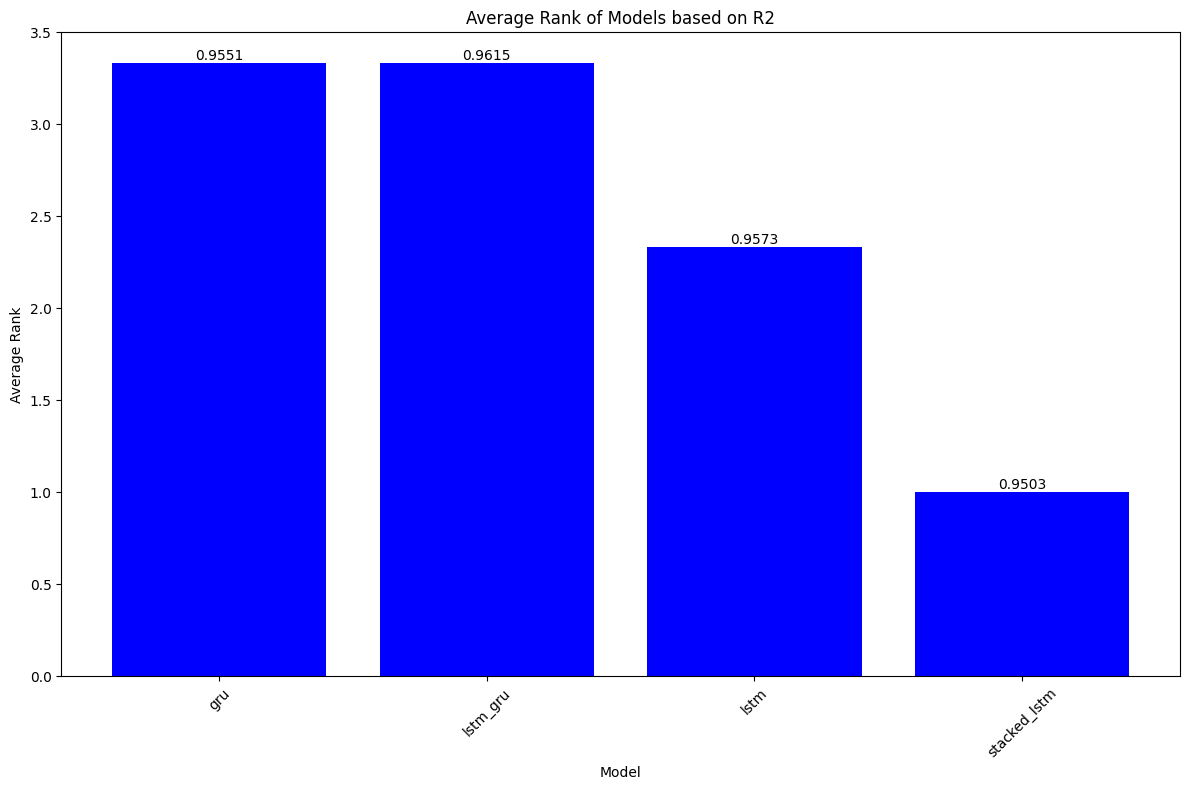

In [18]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# Define the directory containing the JSON files
directory = "./Performance_Dump/Model_Generalization"

# Function to load JSON data
def load_json(file_path):
    with open(file_path) as json_file:
        return json.load(json_file)

# Function to get RMSE scores from each JSON file
def get_rmse_scores(directory):
    rmse_scores = { 'gru': [], 'lstm_gru': [], 'lstm': [], 'stacked_lstm': [] }
    for file in os.listdir(directory):
        if file.endswith('.json'):
            file_name_parts = file.split('.')[0].split('_')
            condition = file_name_parts[2]  # Extract the condition number
            model_name = '_'.join(file_name_parts[3:]).lower()  # Extract the model name
            data = load_json(os.path.join(directory, file))
            for bearing, metrics in data.items():
                rmse_scores[model_name].append(metrics['R2'])
    return rmse_scores

# Get RMSE scores
rmse_scores = get_rmse_scores(directory)

# Calculate ranks for each model
ranks = { 'gru': [], 'lstm_gru': [], 'lstm': [], 'stacked_lstm': [] }
average_rmses = { 'gru': [], 'lstm_gru': [], 'lstm': [], 'stacked_lstm': [] }
for condition in range(1, 4):  # Iterate over each condition
    condition_scores = { model: [] for model in ranks.keys() }
    for model, rmses in rmse_scores.items():
        for i, rmse in enumerate(rmses):
            if (i // 7) + 1 == condition:  # Check if the current RMSE corresponds to the current condition
                condition_scores[model].append(rmse)
    sorted_models = sorted(condition_scores.keys(), key=lambda x: np.mean(condition_scores[x]), reverse=False)
    for rank, model in enumerate(sorted_models):
        ranks[model].append(rank + 1)
        average_rmses[model].append(np.mean(condition_scores[model]))

# Calculate average rank and average RMSE for each model
average_ranks = {model: np.mean(ranks[model]) for model in ranks}
average_rmse_values = {model: np.mean(rmse) for model, rmse in average_rmses.items()}

# Convert to DataFrame for better visualization
df = pd.DataFrame({
    'Model': list(average_ranks.keys()),
    'Average Rank': list(average_ranks.values()),
    'Average RMSE': list(average_rmse_values.values())
})
df = df.sort_values(by='Average Rank', ascending=False)

# Plotting the average ranks with average RMSE above the bars
plt.figure(figsize=(12, 8))
bars = plt.bar(df['Model'], df['Average Rank'], color='blue')
plt.xlabel('Model')
plt.ylabel('Average Rank')
plt.title('Average Rank of Models based on R2')

# Annotate bars with average RMSE values
for bar, avg_rmse in zip(bars, df['Average RMSE']):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(avg_rmse, 4), ha='center', va='bottom')

print(df)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


          Model  Average Rank  Average RMSE
0           gru      1.000000      0.009831
1      lstm_gru      2.333333      0.014899
2          lstm      2.666667      0.015544
3  stacked_lstm      4.000000      0.020390


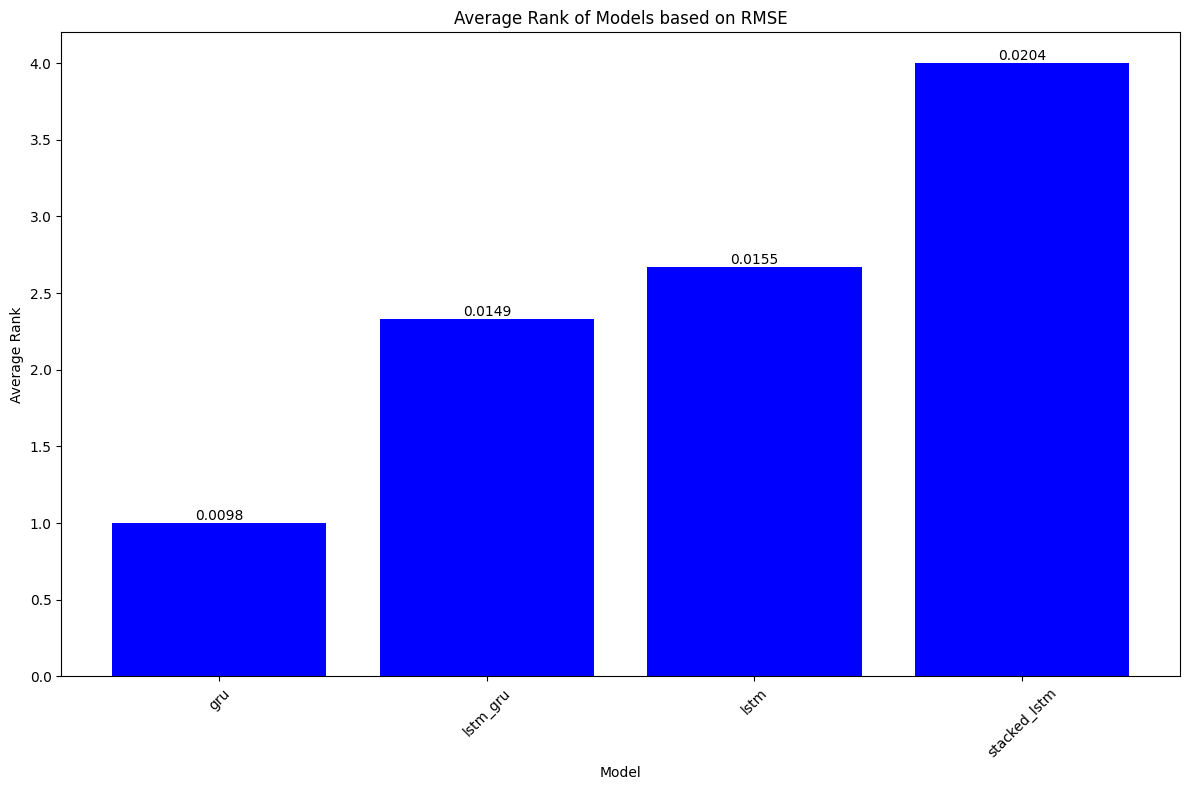

In [17]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# Define the directory containing the JSON files
directory = "./Performance_Dump/Model_Generalization"

# Function to load JSON data
def load_json(file_path):
    with open(file_path) as json_file:
        return json.load(json_file)

# Function to get RMSE scores from each JSON file
def get_rmse_scores(directory):
    rmse_scores = { 'gru': [], 'lstm_gru': [], 'lstm': [], 'stacked_lstm': [] }
    for file in os.listdir(directory):
        if file.endswith('.json'):
            file_name_parts = file.split('.')[0].split('_')
            condition = file_name_parts[2]  # Extract the condition number
            model_name = '_'.join(file_name_parts[3:]).lower()  # Extract the model name
            data = load_json(os.path.join(directory, file))
            for bearing, metrics in data.items():
                rmse_scores[model_name].append(metrics['rmse'])
    return rmse_scores

# Get RMSE scores
rmse_scores = get_rmse_scores(directory)

# Calculate ranks for each model
ranks = { 'gru': [], 'lstm_gru': [], 'lstm': [], 'stacked_lstm': [] }
average_rmses = { 'gru': [], 'lstm_gru': [], 'lstm': [], 'stacked_lstm': [] }
for condition in range(1, 4):  # Iterate over each condition
    condition_scores = { model: [] for model in ranks.keys() }
    for model, rmses in rmse_scores.items():
        for i, rmse in enumerate(rmses):
            if (i // 7) + 1 == condition:  # Check if the current RMSE corresponds to the current condition
                condition_scores[model].append(rmse)
    sorted_models = sorted(condition_scores.keys(), key=lambda x: np.mean(condition_scores[x]))
    for rank, model in enumerate(sorted_models):
        ranks[model].append(rank + 1)
        average_rmses[model].append(np.mean(condition_scores[model]))

# Calculate average rank and average RMSE for each model
average_ranks = {model: np.mean(ranks[model]) for model in ranks}
average_rmse_values = {model: np.mean(rmse) for model, rmse in average_rmses.items()}

# Convert to DataFrame for better visualization
df = pd.DataFrame({
    'Model': list(average_ranks.keys()),
    'Average Rank': list(average_ranks.values()),
    'Average RMSE': list(average_rmse_values.values())
})
df = df.sort_values(by='Average Rank')

# Plotting the average ranks with average RMSE above the bars
plt.figure(figsize=(12, 8))
bars = plt.bar(df['Model'], df['Average Rank'], color='blue')
plt.xlabel('Model')
plt.ylabel('Average Rank')
plt.title('Average Rank of Models based on RMSE')

# Annotate bars with average RMSE values
for bar, avg_rmse in zip(bars, df['Average RMSE']):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(avg_rmse, 4), ha='center', va='bottom')

print(df)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Format all data into DF

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

bearing_ids = [x for x in [list(y.keys())[0] for y in LSTM_dat]]

# config -> 0 = 25% train, 1 = 50% train, 2 = 75% train
config = [0, "rmse"]
r2_25_perc = {
    'Poly-Reg_Logistic': getMetricScore(Poly_Reg_Logistic_dat, config[0], config[1]),
    'GPR_Logistic': getMetricScore(GPR_dat, config[0], config[1]),
    'LSTM': getMetricScore(LSTM_dat, config[0], config[1]),
    'Stacked-LSTM': getMetricScore(Stacked_LSTM_dat, config[0], config[1]),
    'GRU': getMetricScore(GRU_dat, config[0], config[1]),
    'LSTM-GRU': getMetricScore(LSTM_GRU_dat, config[0], config[1]),
}

In [11]:
x = r2_25_perc["Poly-Reg_Logistic"]
pd.DataFrame(x, index = [""]*len(x)).to_clipboard()